<a href="https://colab.research.google.com/github/marivic9/EDA-CS-103/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [63]:
#packages
from pandas import read_csv
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [64]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv("/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv")

# **Shape**

In [65]:
#Shape
shape = data.shape
print(shape)

(768, 9)


# **Data type**

In [66]:
#Data type
types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


# **Descriptive Analysis**

In [67]:
#Descriptive Analysis
data.describe()
data.describe(include='all')

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
data = data.rename(columns = {'preg': 'Pregnancies',
                          'plas' : 'Glucose',
                          'pres':'Blood_Pressure',
                          'skin': 'Skin_Thickness',
                          'test': 'Insulin',
                          'mass': 'BMI',
                          'pedi':'Diabetes_Pedigree_Function',
                          'age': 'Age',
                          'class': 'Outcome' })
data.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Class Distribution**

In [69]:
#Class Distribution
Outcome_counts = data.groupby('Outcome').size()
print(Outcome_counts)

Outcome
0    500
1    268
dtype: int64


# Attributes Graph - Class Distribution

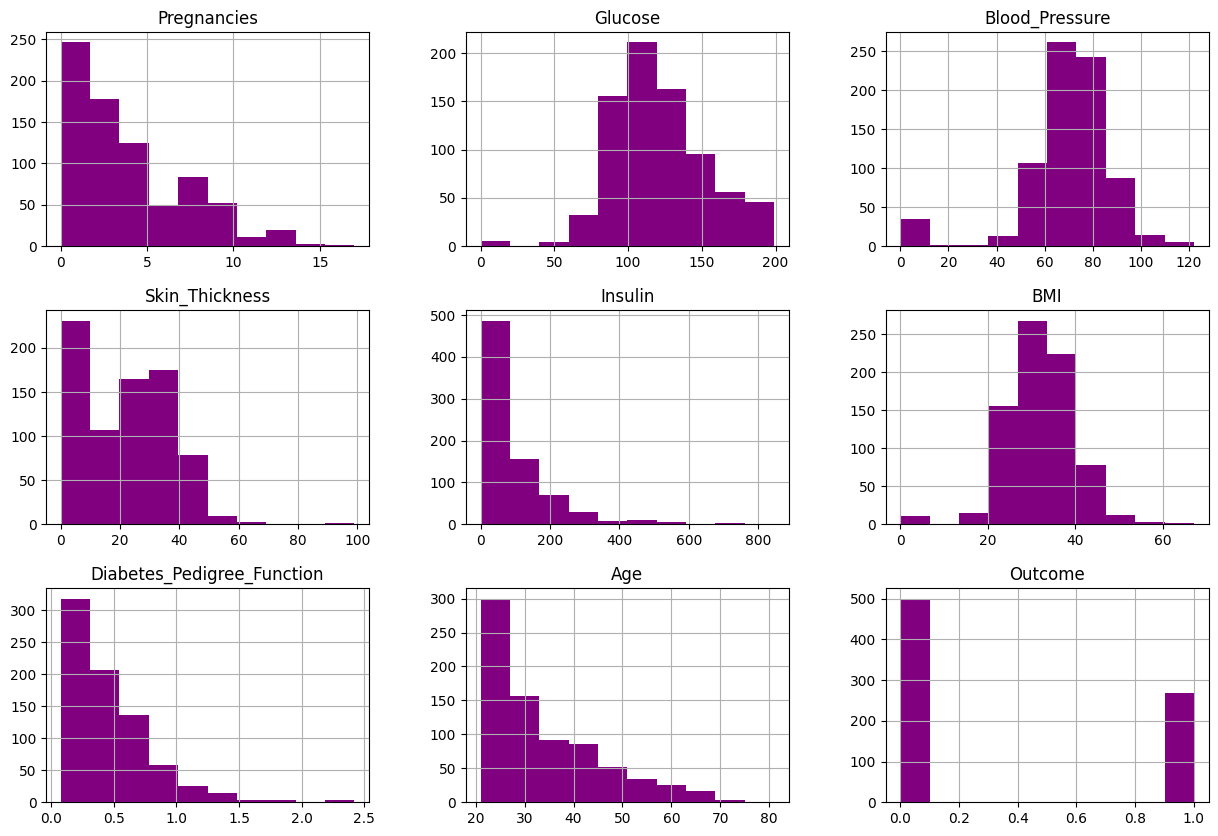

In [70]:
#Graph
pyplot.rcParams['figure.figsize'] = (15, 10)
data.hist(color = 'purple')
pyplot.show()

# **Correlation**

                            Pregnancies   Glucose  Blood_Pressure  \
Pregnancies                    1.000000  0.129459        0.141282   
Glucose                        0.129459  1.000000        0.152590   
Blood_Pressure                 0.141282  0.152590        1.000000   
Skin_Thickness                -0.081672  0.057328        0.207371   
Insulin                       -0.073535  0.331357        0.088933   
BMI                            0.017683  0.221071        0.281805   
Diabetes_Pedigree_Function    -0.033523  0.137337        0.041265   
Age                            0.544341  0.263514        0.239528   
Outcome                        0.221898  0.466581        0.065068   

                            Skin_Thickness   Insulin       BMI  \
Pregnancies                      -0.081672 -0.073535  0.017683   
Glucose                           0.057328  0.331357  0.221071   
Blood_Pressure                    0.207371  0.088933  0.281805   
Skin_Thickness                    1.000000  0

<Axes: >

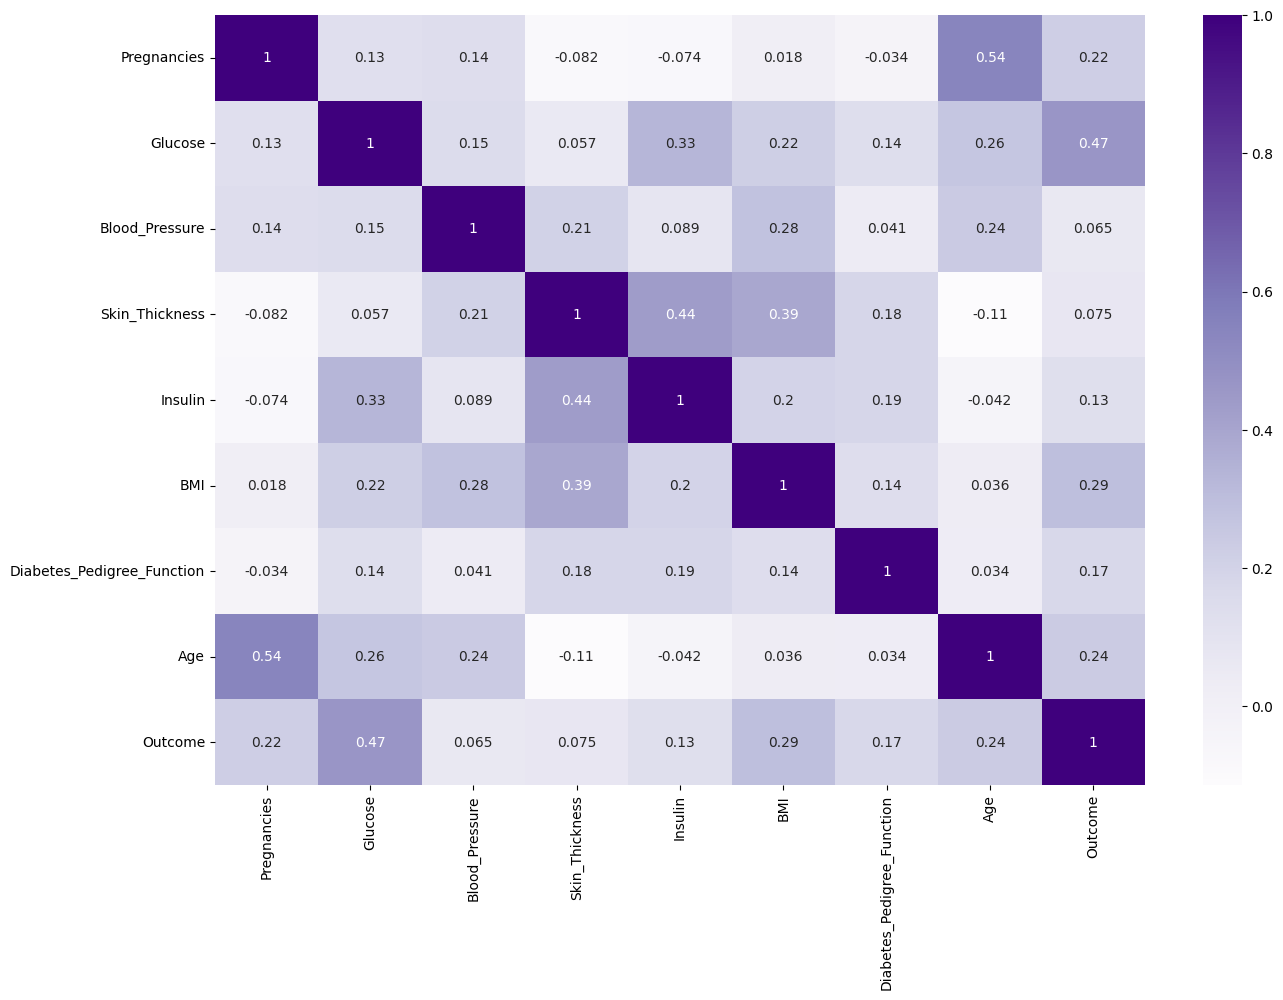

In [71]:
#Correlation
correlations = data.corr(method='pearson')
type(correlations)
print(correlations)

sns.heatmap(correlations, annot=True, cmap='Purples')

This heatmap shows how different features in a dataset are related to each other using correlation values. Correlation measures how one feature changes with another. The values range from -1 to 1, where 1 means a strong positive relationship, -1 means a strong negative relationship, and 0 means no relationship. Dark blue squares represent high positive correlations, light colors show low or no correlation, and negative values are shown by lighter colors towards blue.

From the heatmap, we see that preg (number of pregnancies) and age have a moderate positive correlation of 0.54, indicating that more pregnancies are generally associated with older age. plas (plasma glucose) and test also have a positive correlation of 0.33, meaning higher glucose levels tend to be related to higher test results. Many other features, like pres (blood pressure) and pedi (pedigree), have low correlations (e.g., 0.041), suggesting they do not influence each other much. This heatmap helps identify which features might be similar and which provide unique information, which is useful for analyzing data and building models.

**Skew**

Pregnancies                   0.901674
Glucose                       0.173754
Blood_Pressure               -1.843608
Skin_Thickness                0.109372
Insulin                       2.272251
BMI                          -0.428982
Diabetes_Pedigree_Function    1.919911
Age                           1.129597
Outcome                       0.635017
dtype: float64


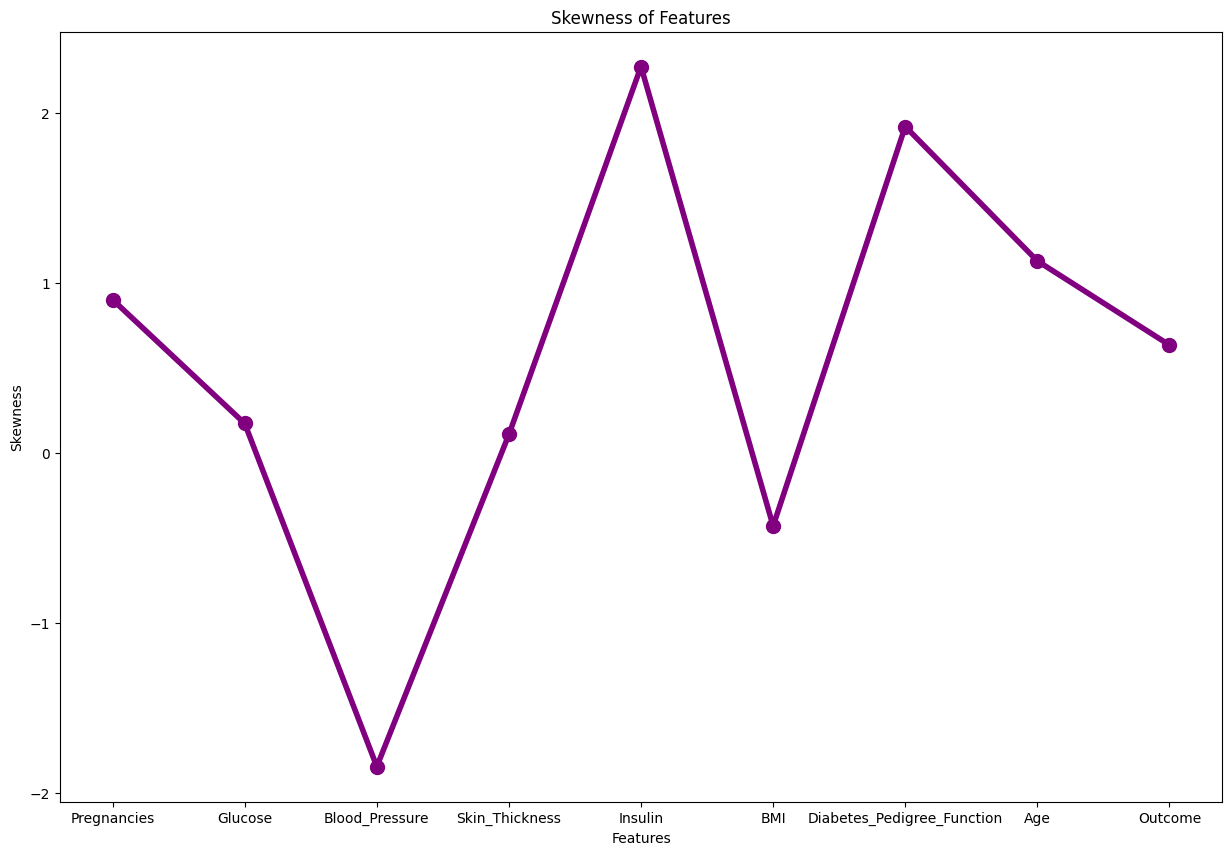

In [72]:
#Skew
skew = data.skew()
print(skew)

data.skew().plot(kind='line', color='purple', linewidth=4, marker = 'o', markersize = 10)
pyplot.title("Skewness of Features")
pyplot.xlabel("Features")
pyplot.ylabel("Skewness")
pyplot.show()

This graph shows the skewness of different features in a dataset, which indicates how the data is distributed. The x-axis lists the features (preg, plas, pres, skin, test, mass, pedi, age, class), and the y-axis shows the skewness values. A positive skewness means the data has more lower values with a long tail to the right, while negative skewness means the opposite, with more higher values and a tail to the left.

From the graph, we see that test has high positive skewness, indicating most values are low, but some are very high. On the other hand, pres has high negative skewness, meaning it has more high values. Features like plas and class are close to zero skewness, showing they are more symmetrical.

These skewness patterns help understand how the data is spread, which is important for making decisions on how to process the data. For highly skewed features, transformations might be needed to improve the accuracy of analyses and models.

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Blood_Pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin_Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes_Pedigree_Function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [74]:
data['Age'].value_counts()

,count
Age,
22,72
21,63
25,48
24,46
23,38
28,35
26,33
27,32
29,29


In [75]:
data_corr = data.corr()
data_corr

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blood_Pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin_Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_Pedigree_Function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [76]:
print(data.isnull().sum())

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64


# Machine Learning (ML) used is **LogisticRegression**

In [77]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y =  data['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

614
154
614
154


LogisticRegression()

In [78]:
y_pred=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:
 [[98  9]
 [18 29]]
Training Score:
 77.19869706840392
Mean Squared Error:
 0.17532467532467533
R2 score is:
 0.1731954662954862


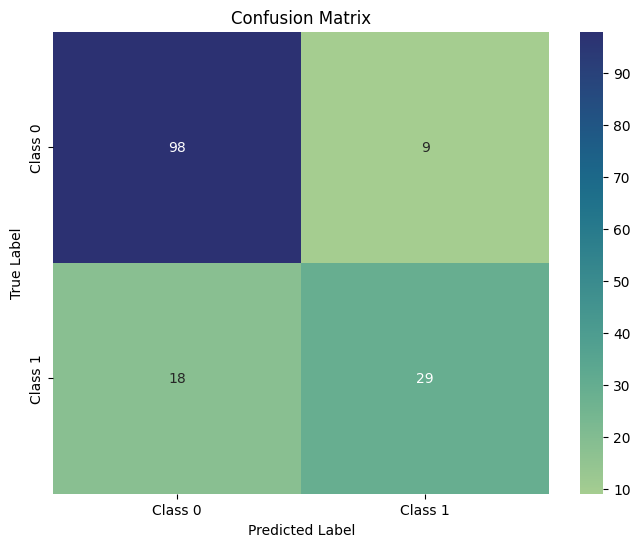

In [79]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [80]:
print(accuracy_score(y_test,y_pred)*100)

82.46753246753246


# Breakdown of the Provided Confusion Matrix:

**Key Metrics:**
- True Positives (TP): 98
- True Negatives (TN): 29
- False Positives (FP): 9
- False Negatives (FN): 18

**Calculated Performance Metrics: Accuracy: 78%**

**Interpretation:**
- The model correctly predicted the outcome for 82% of the cases.
- The model accurately diagnose diabetes, as evidenced by the relatively high number of true negatives.







# **Sept. 09, 2024 - HISTOGRAM, DENSITY PLOT, BOX AND WHISKERPLOT (Boxplot), and SCATTERPLOT**

HISTOGRAM

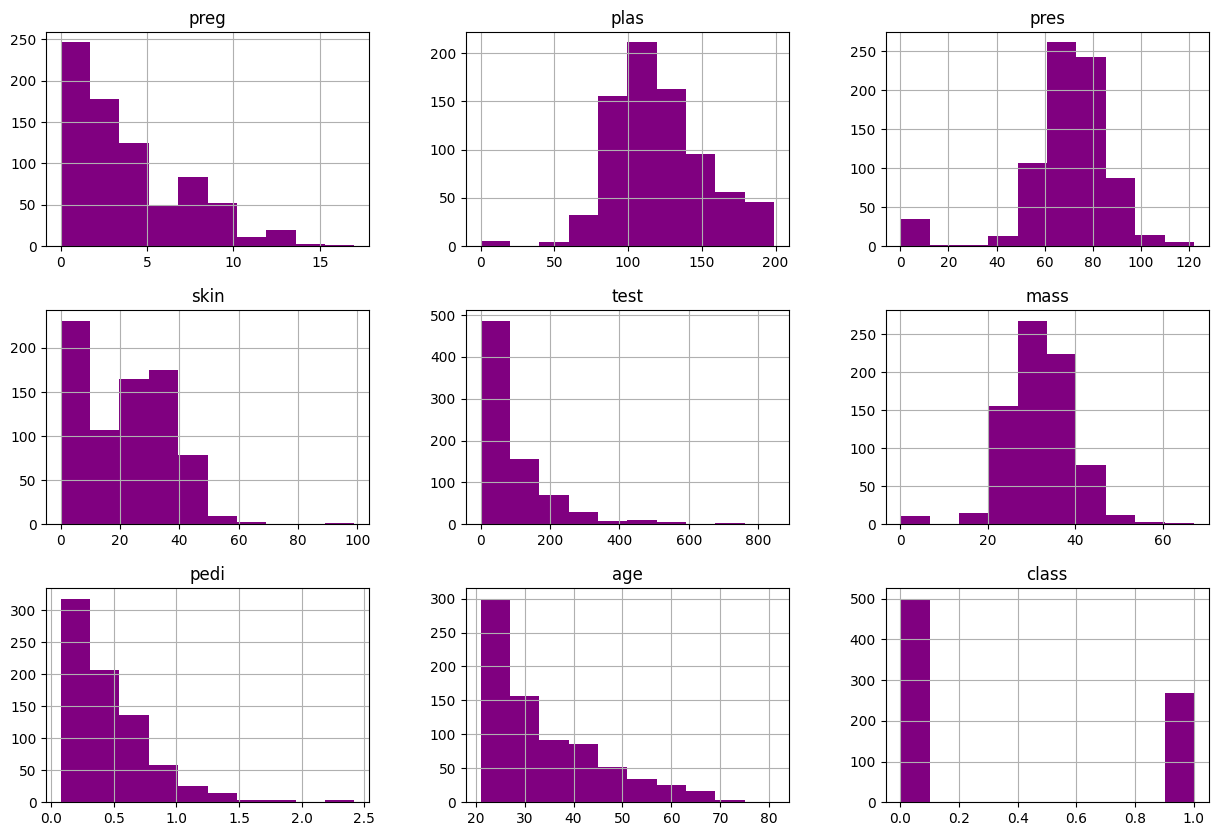

In [82]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv("/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv")

data.hist(color='purple')
pyplot.show()

DENSITY PLOT

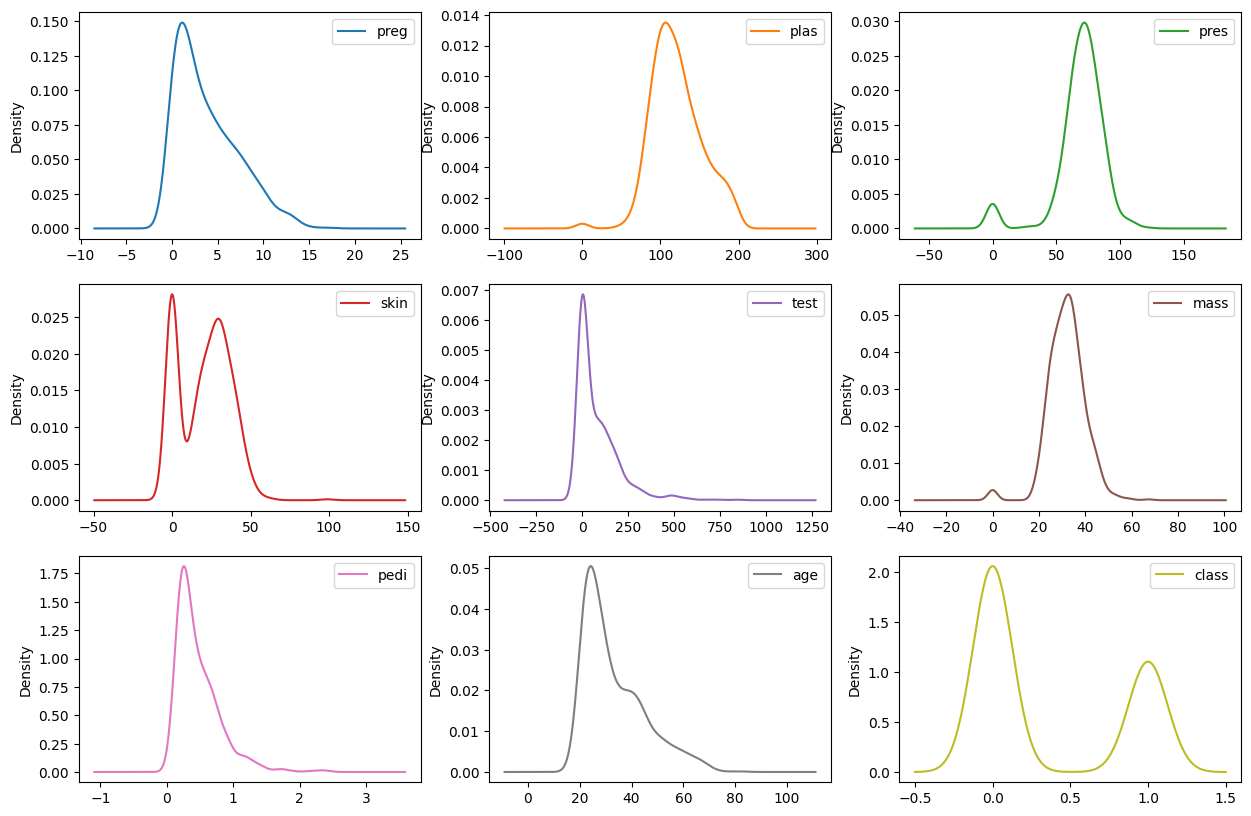

In [86]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv("/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv")

data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

BOX AND WHISKERPLOT (Boxplot)

<Figure size 1200x800 with 0 Axes>

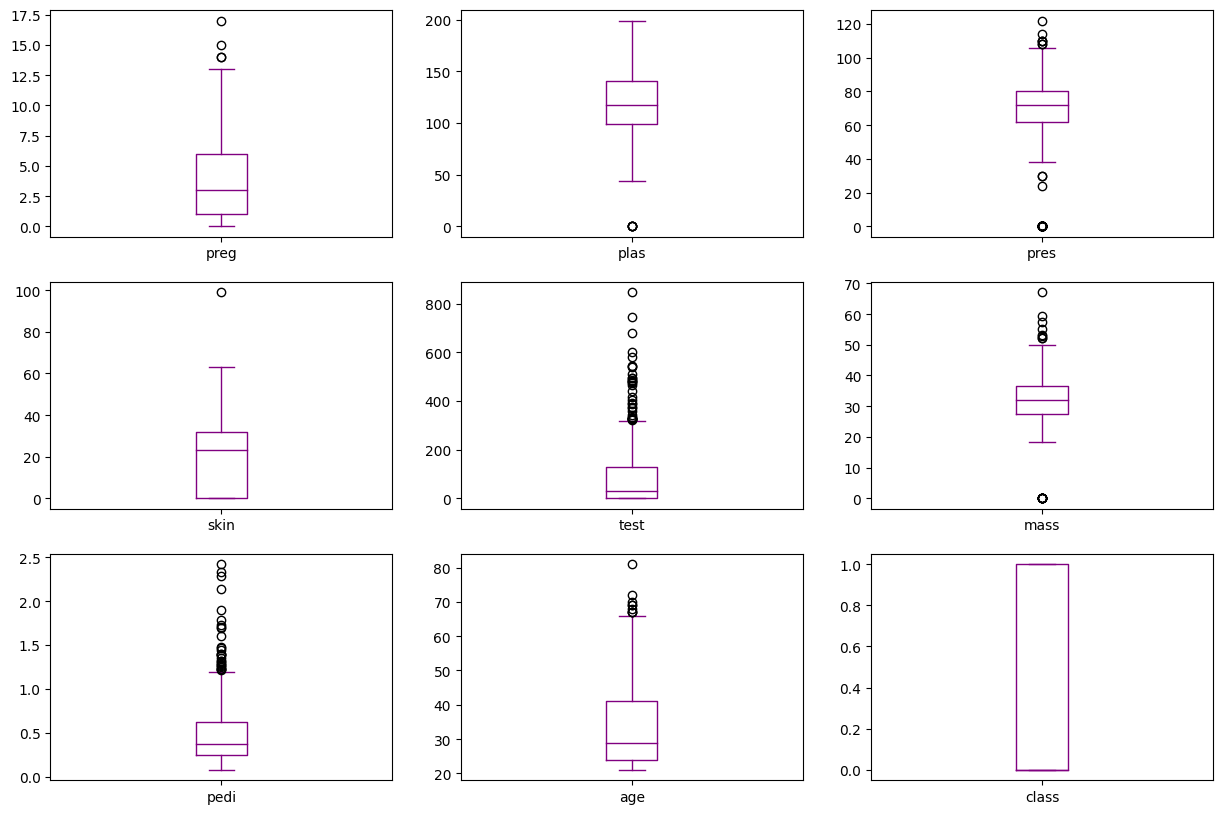

In [88]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv("/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv")

pyplot.figure(figsize=(12, 8))
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, color='purple')
pyplot.show()

SCATTERPLOT

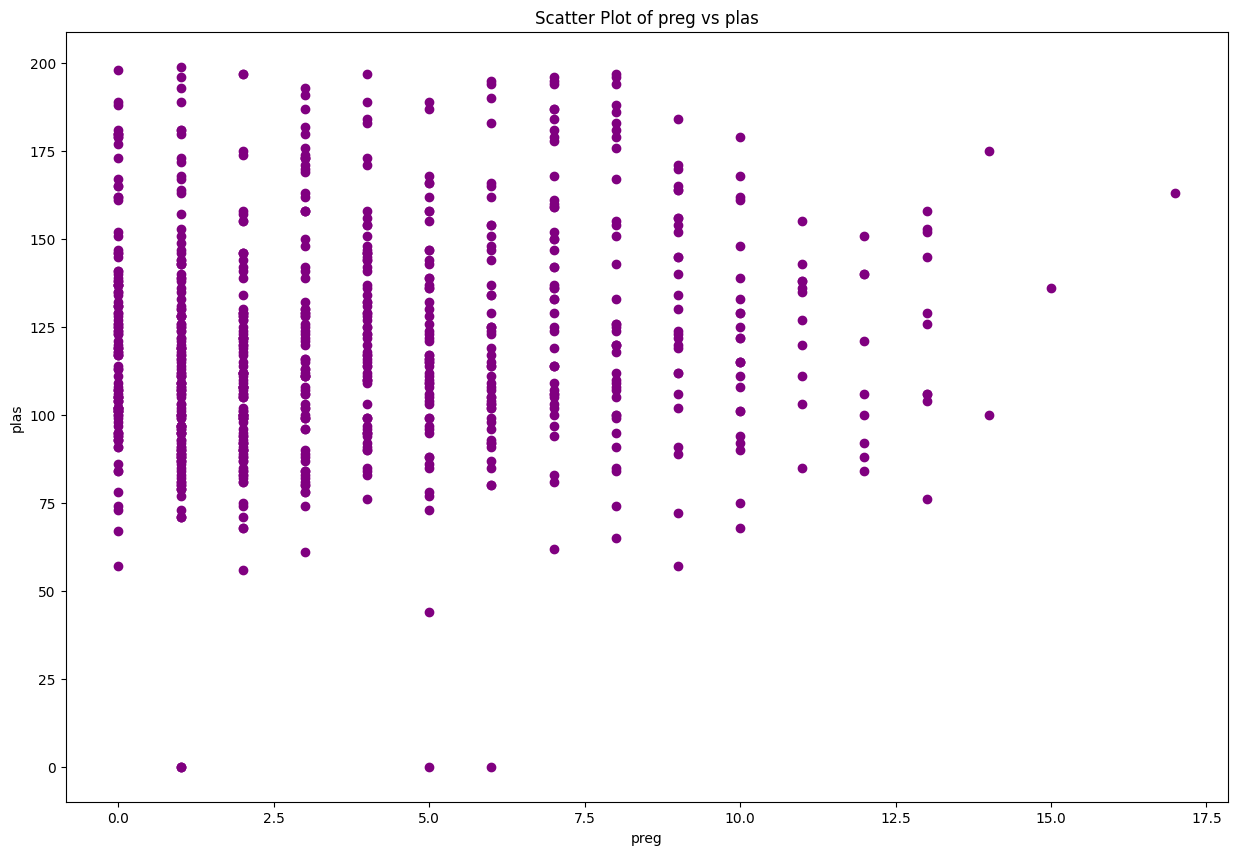

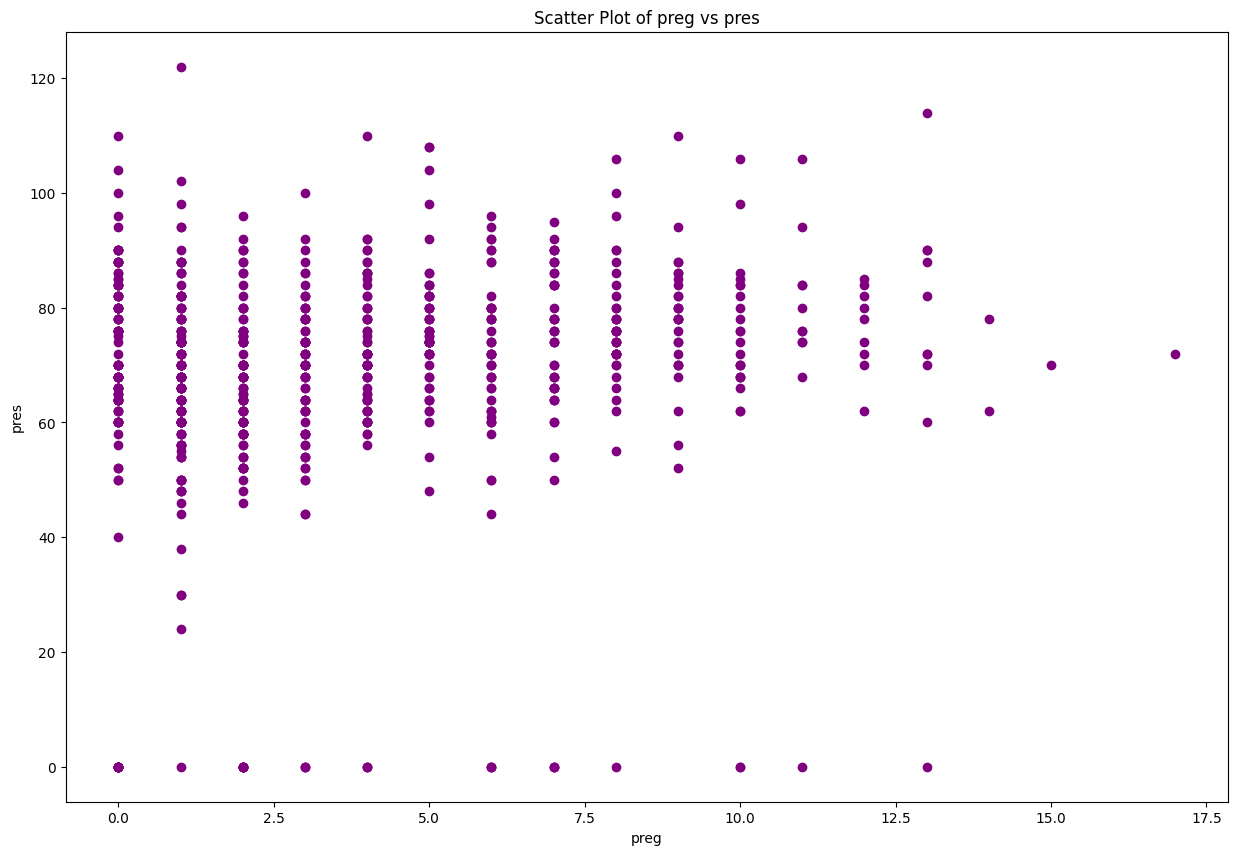

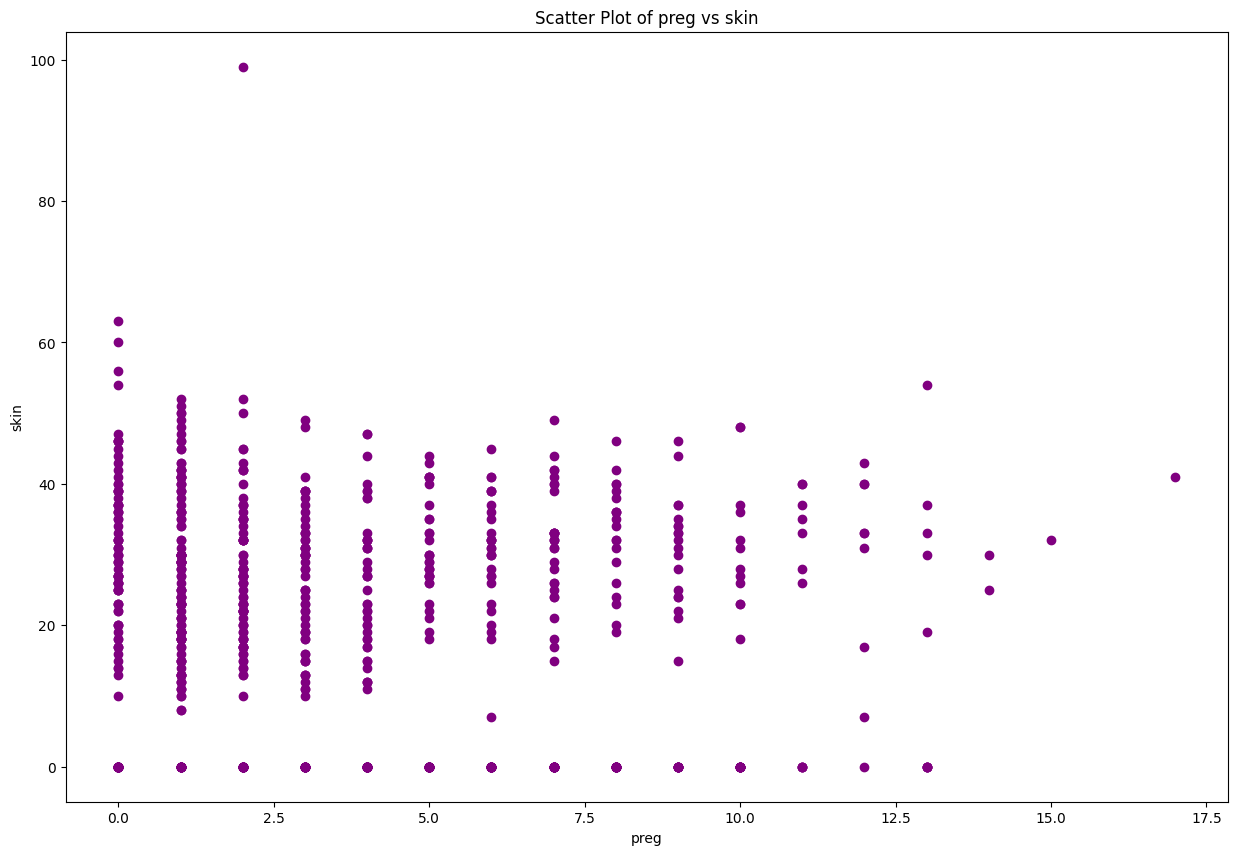

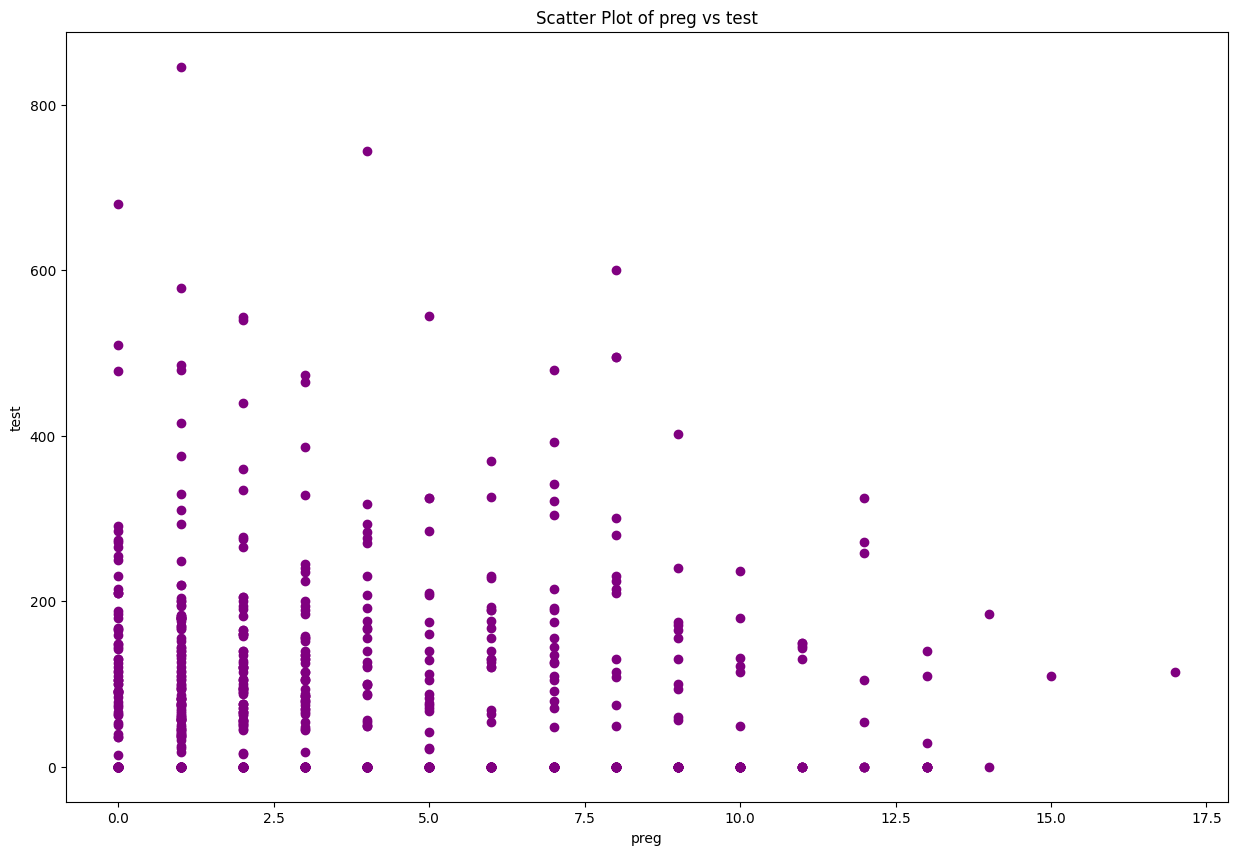

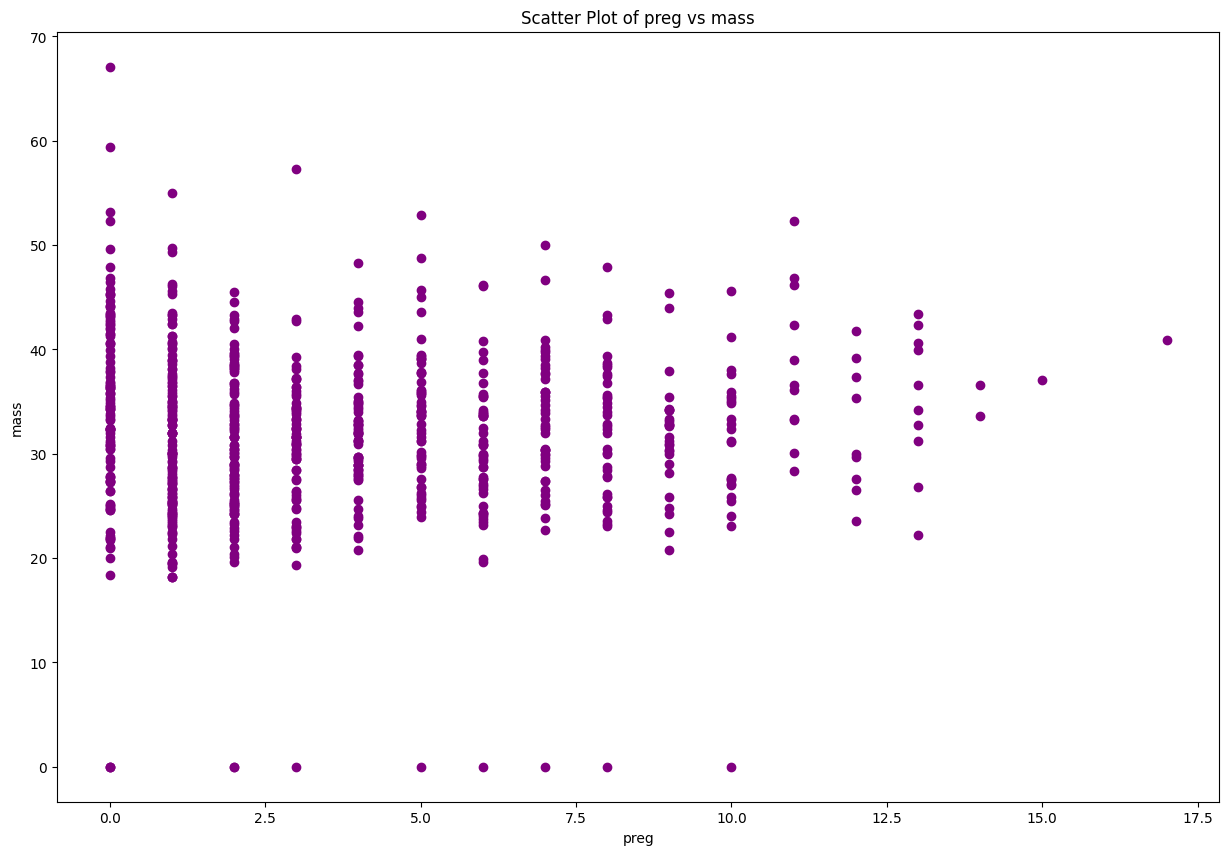

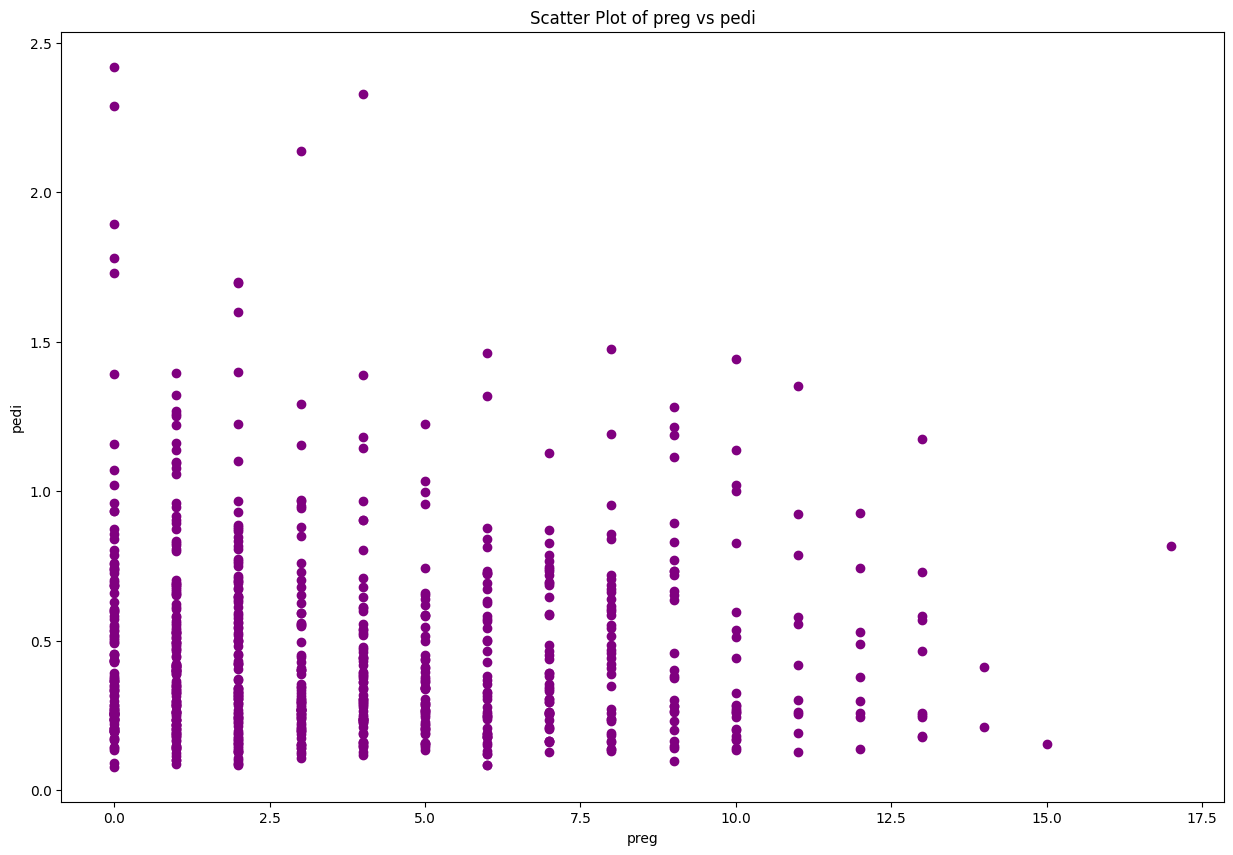

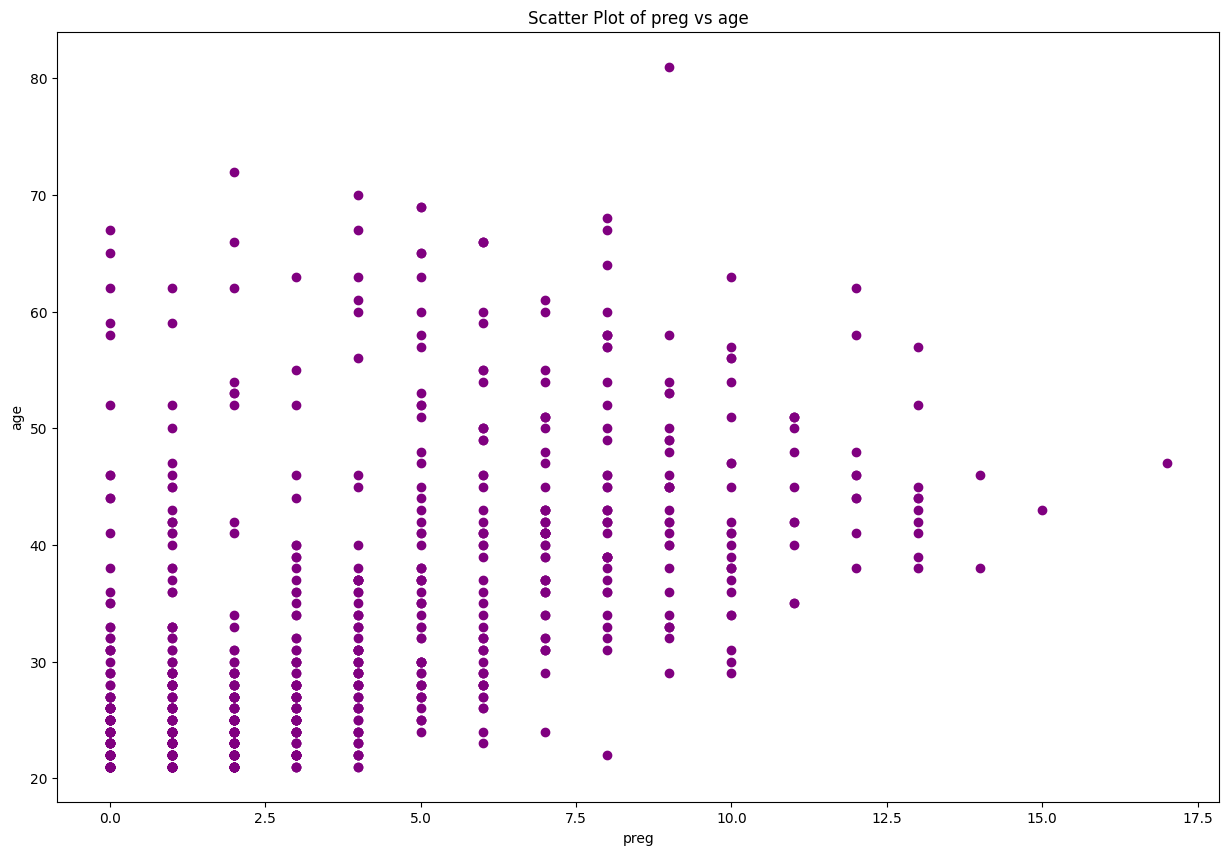

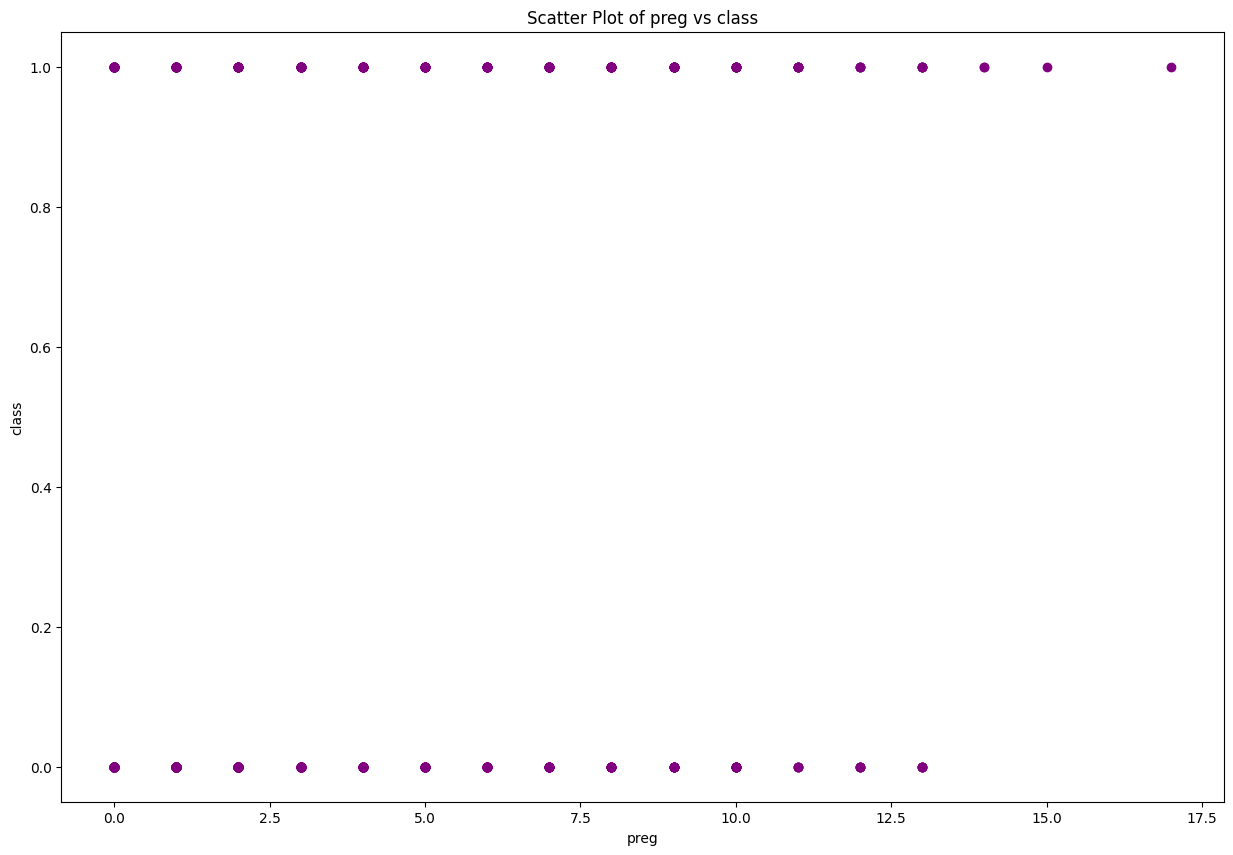

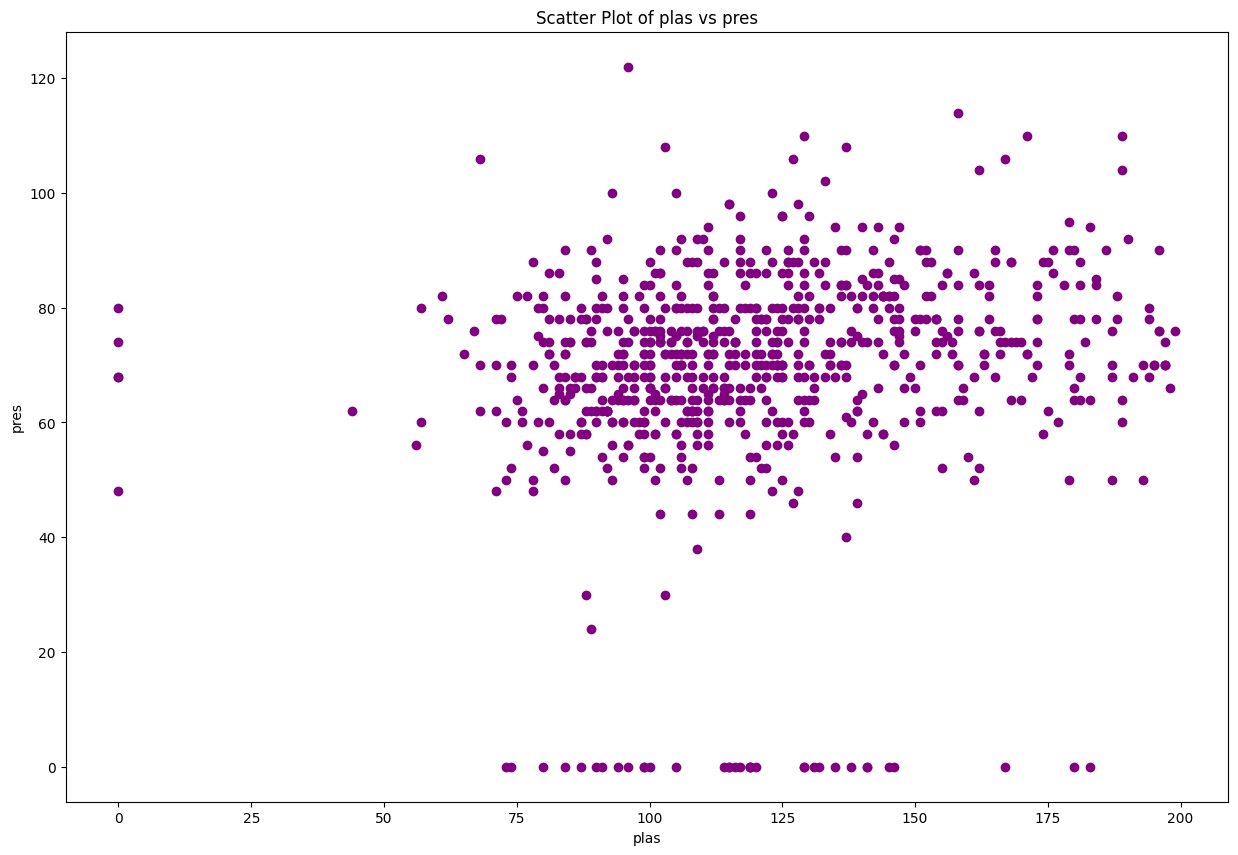

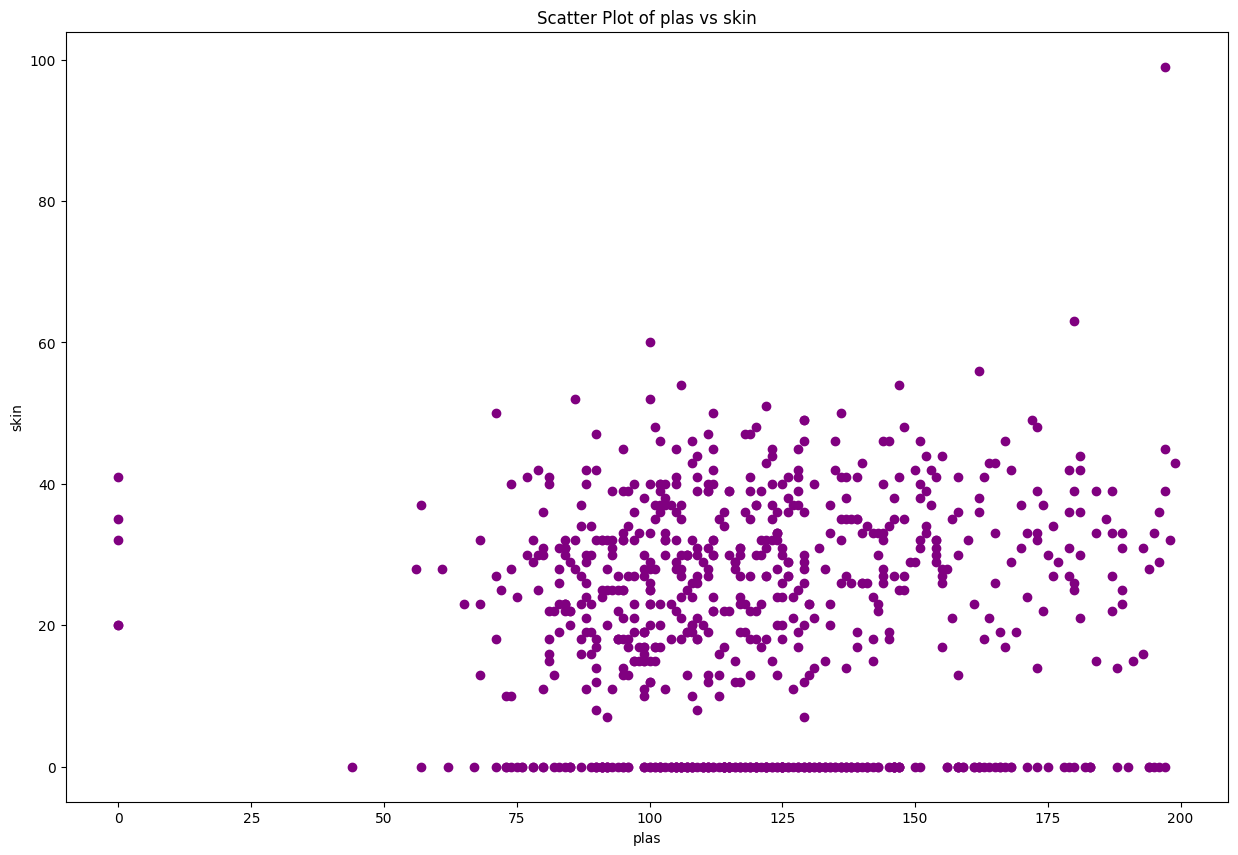

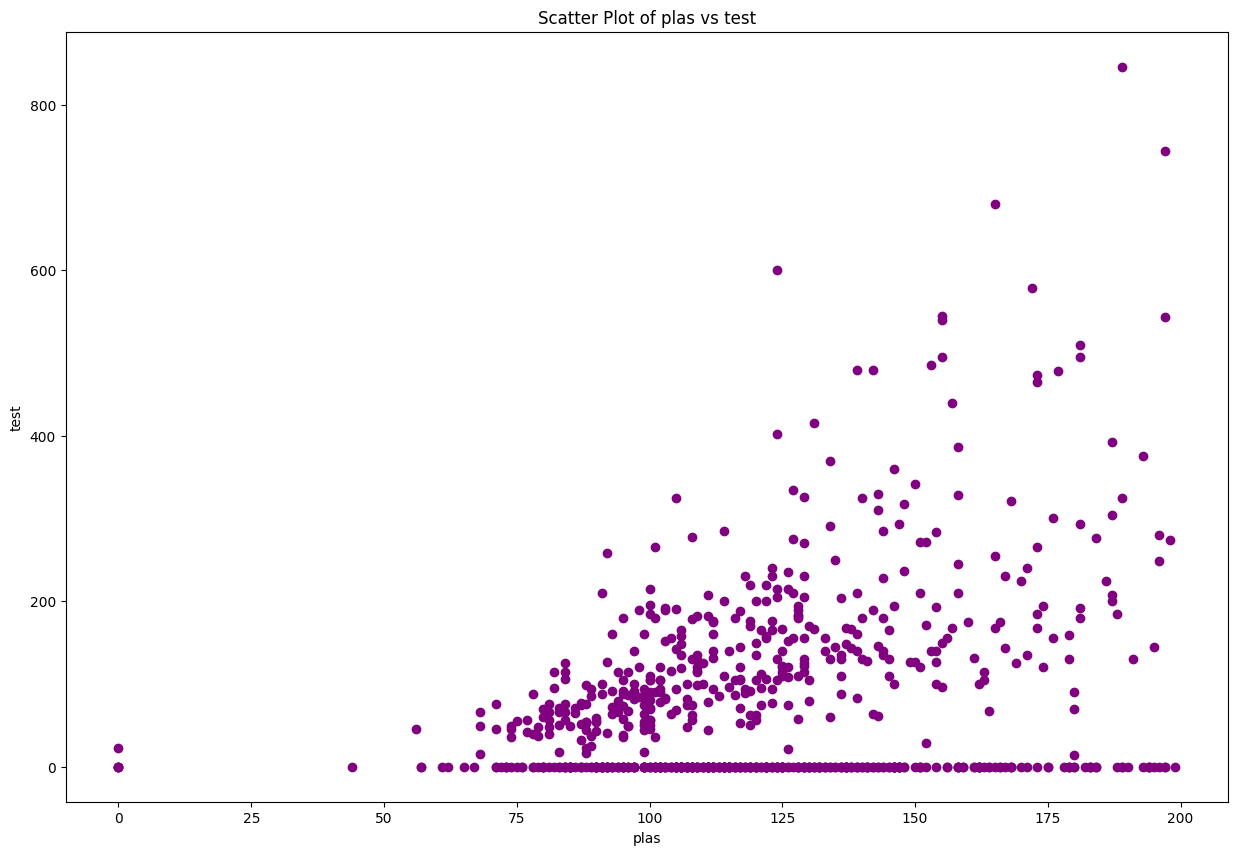

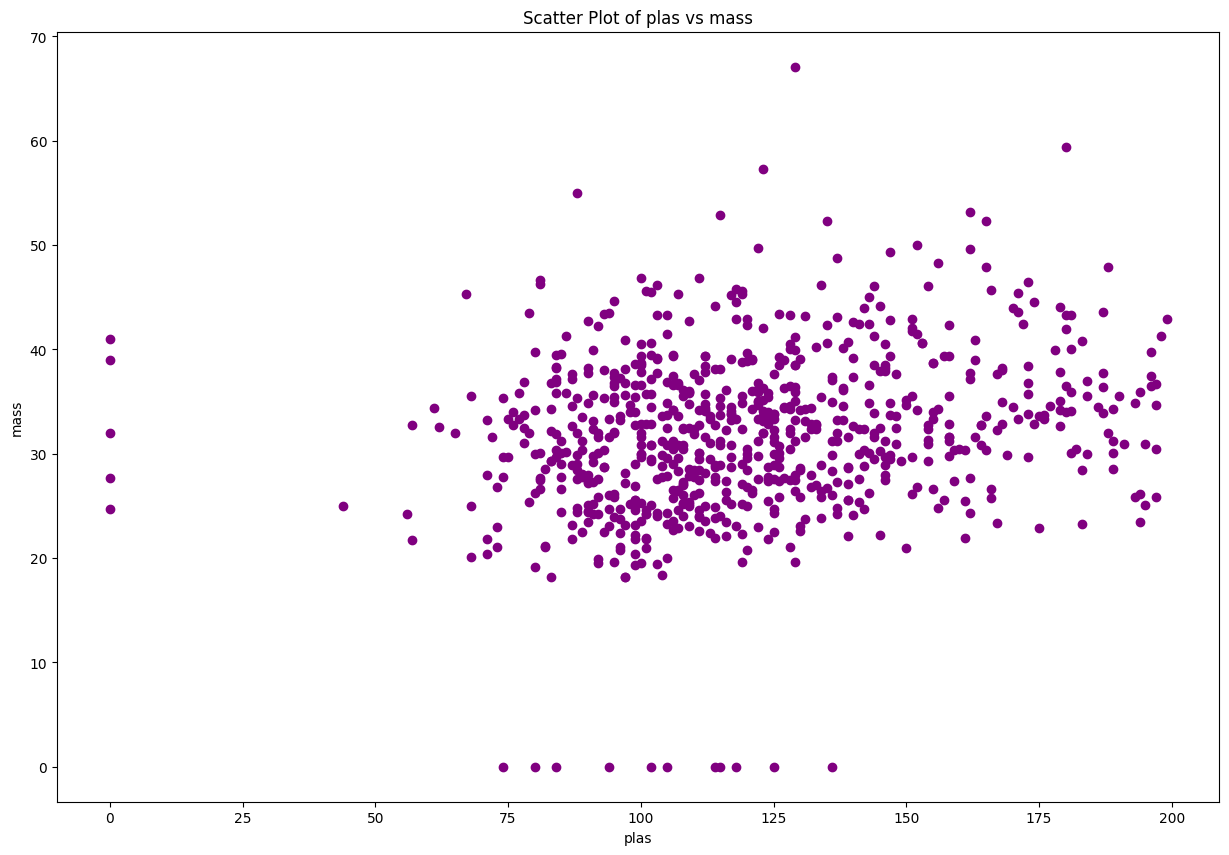

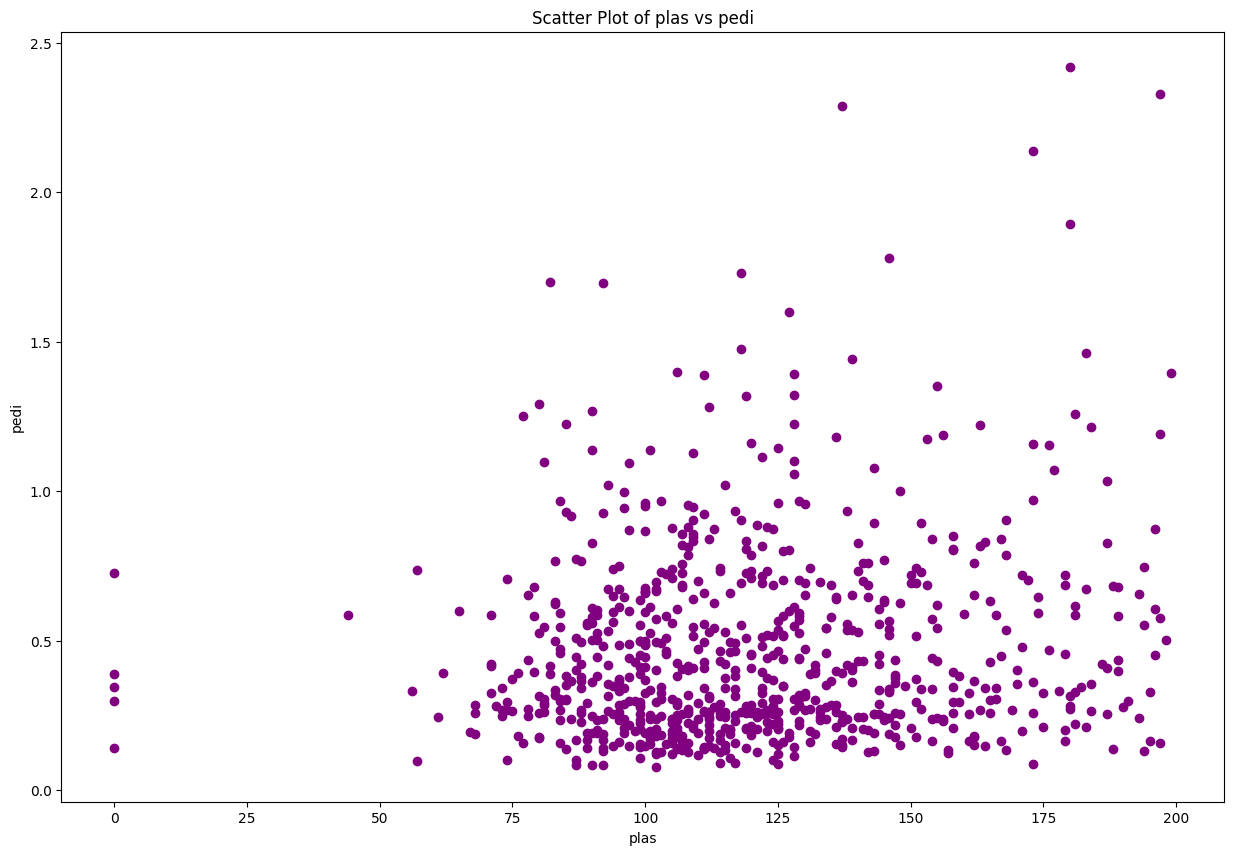

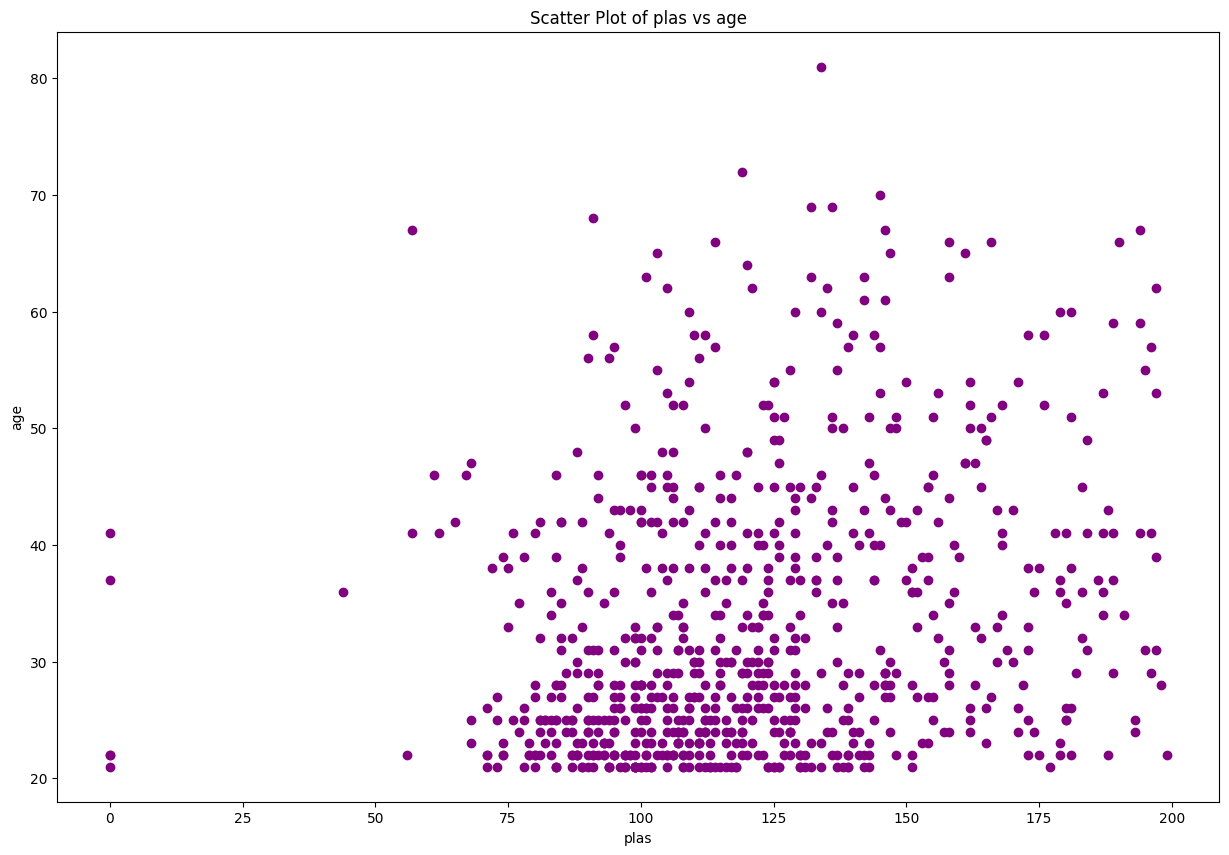

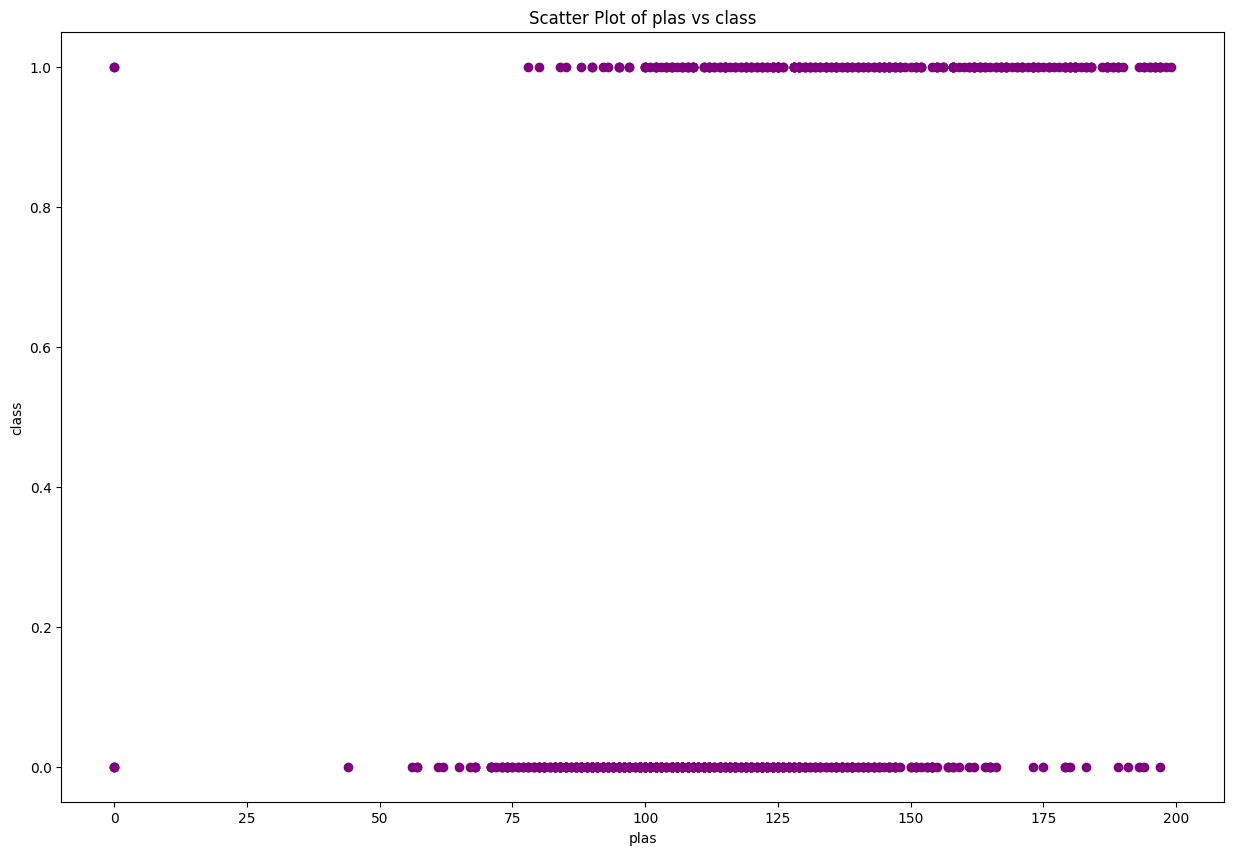

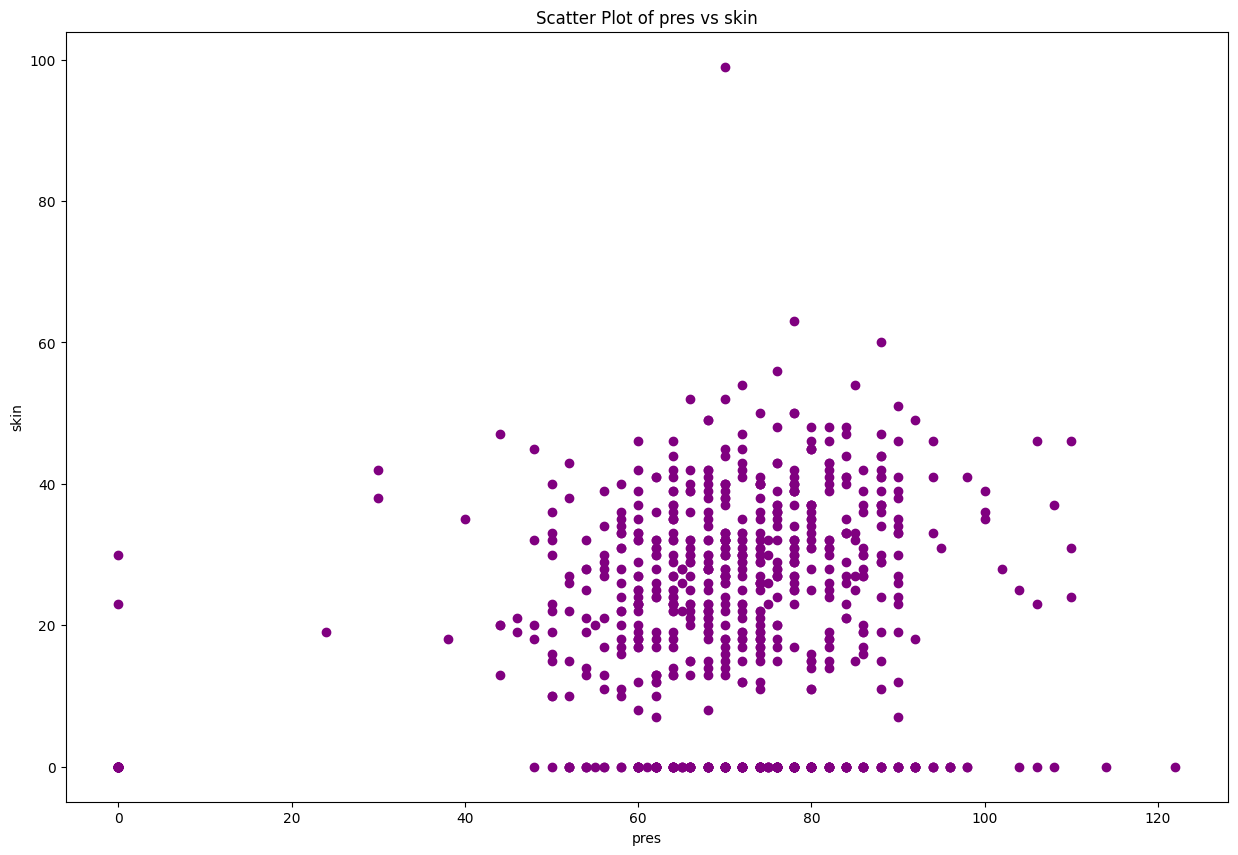

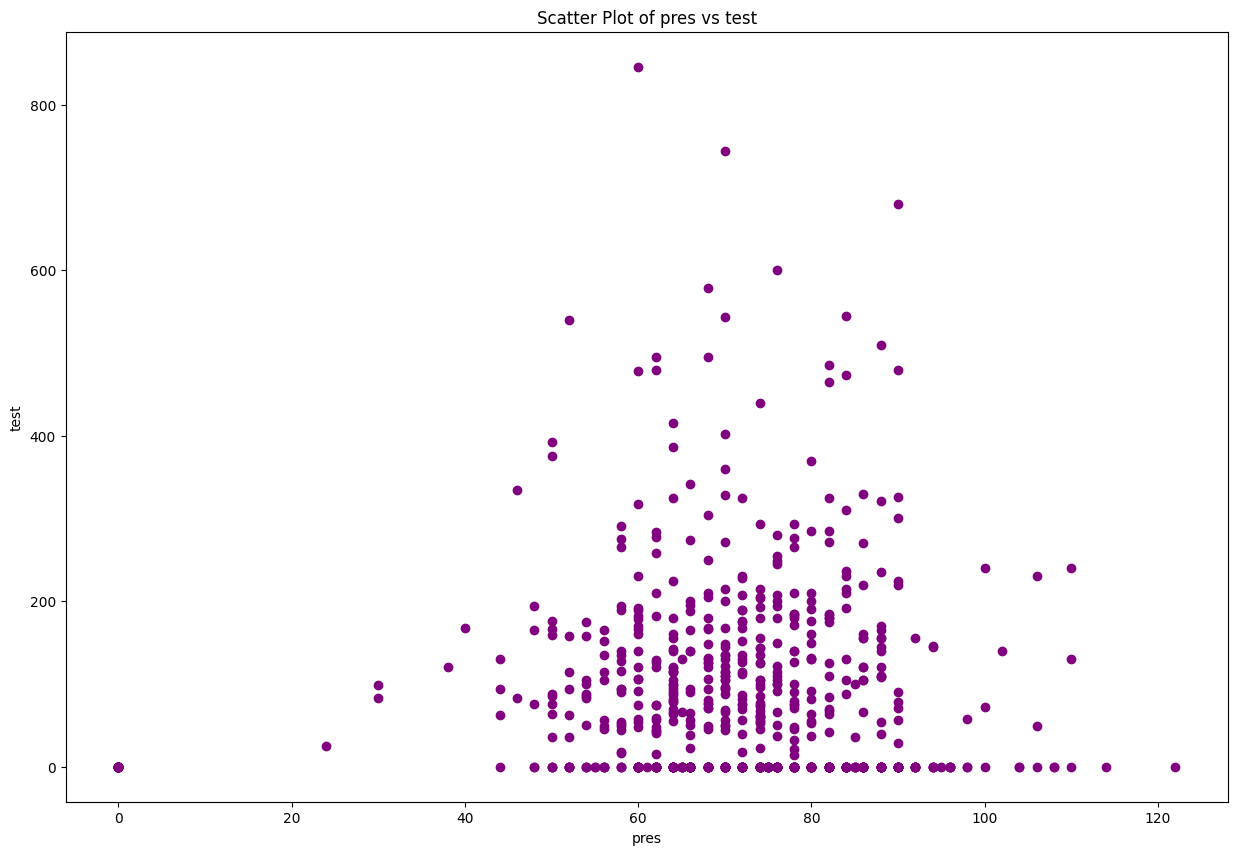

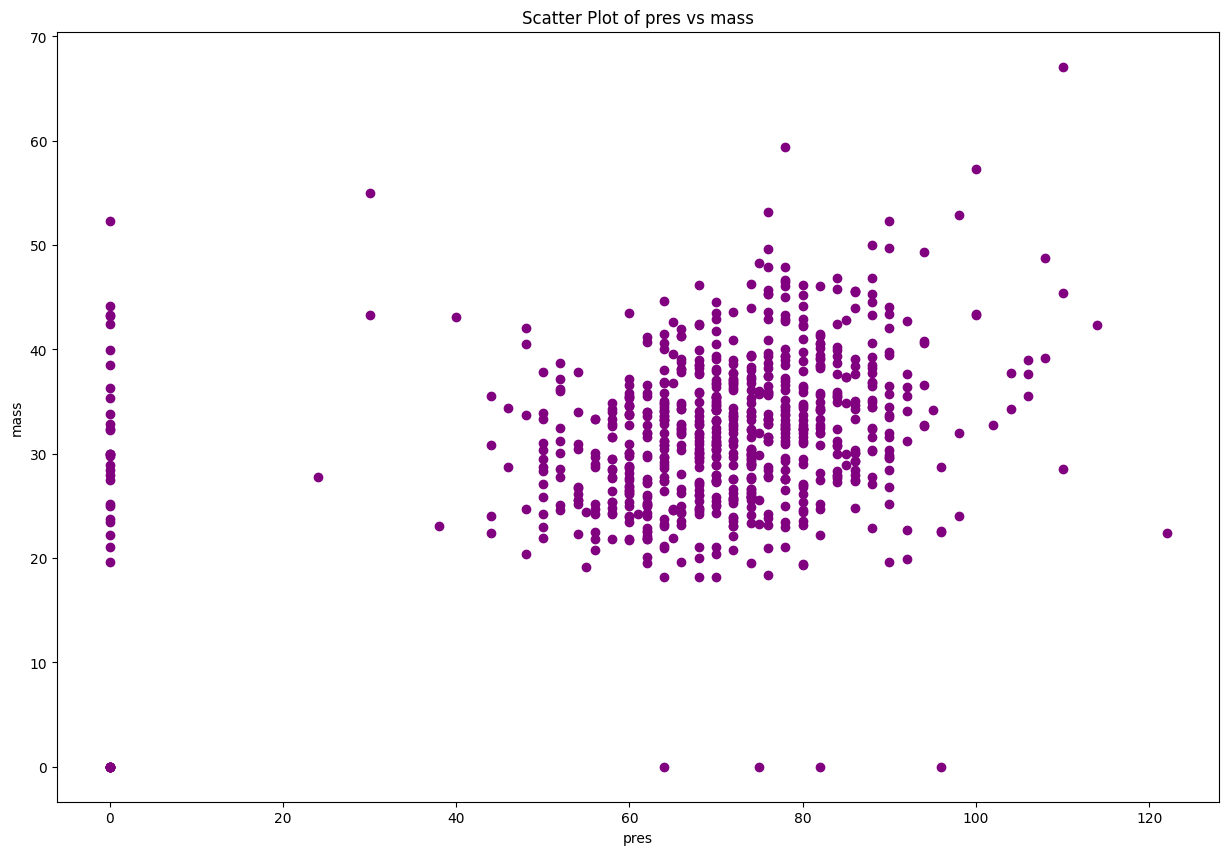

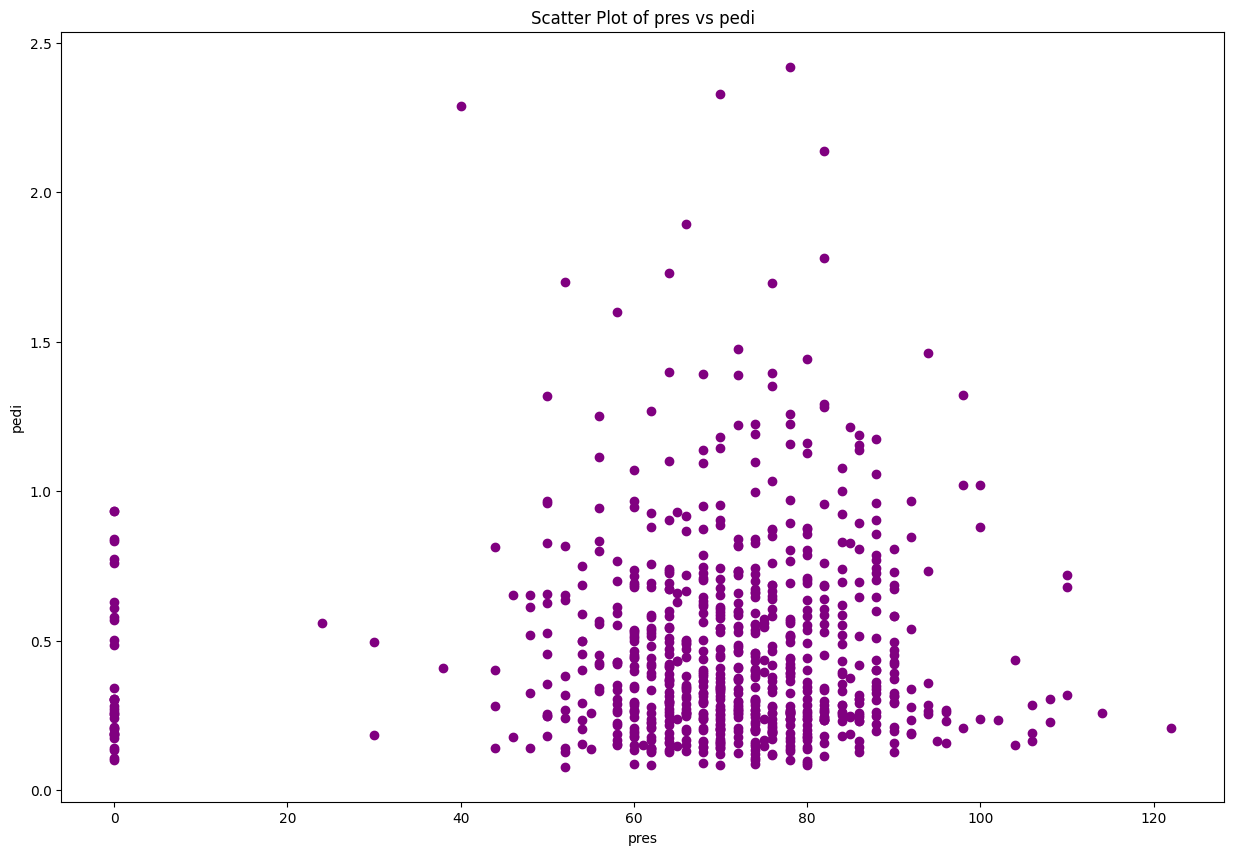

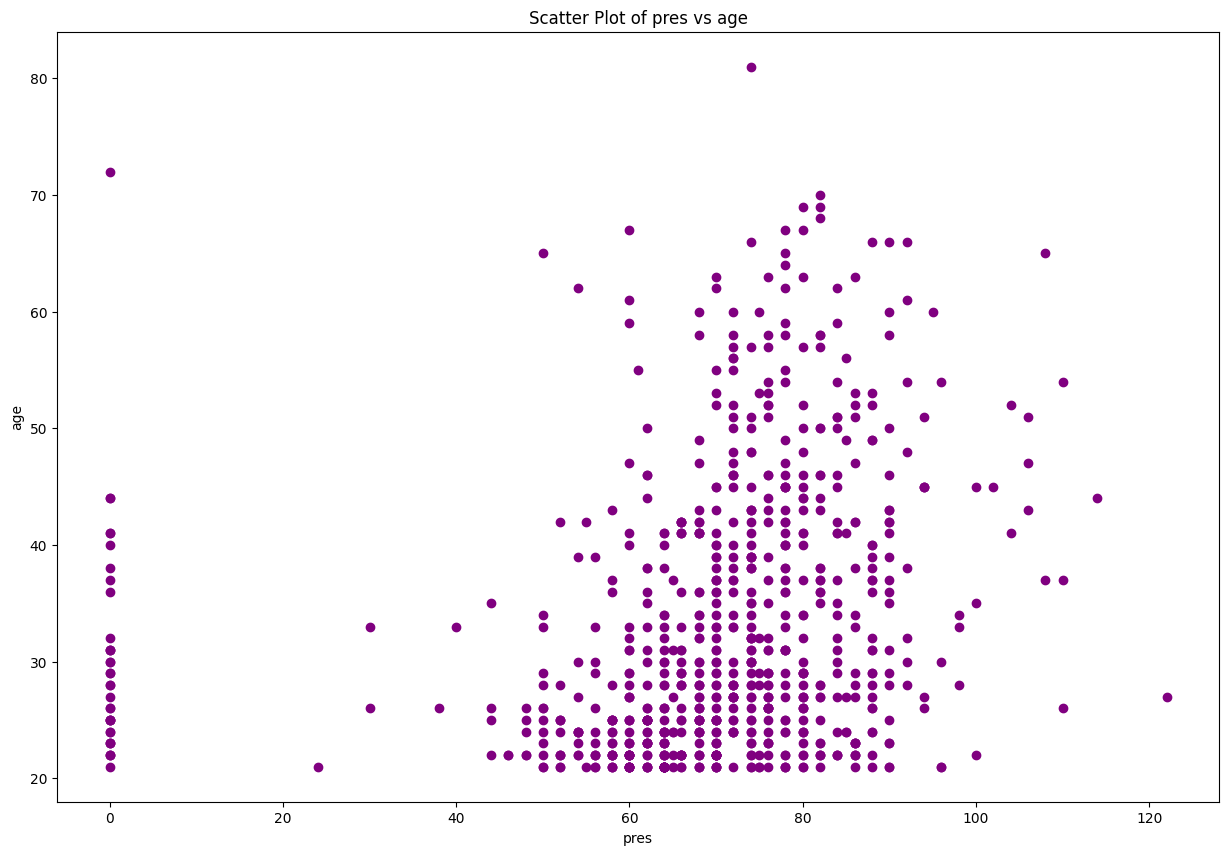

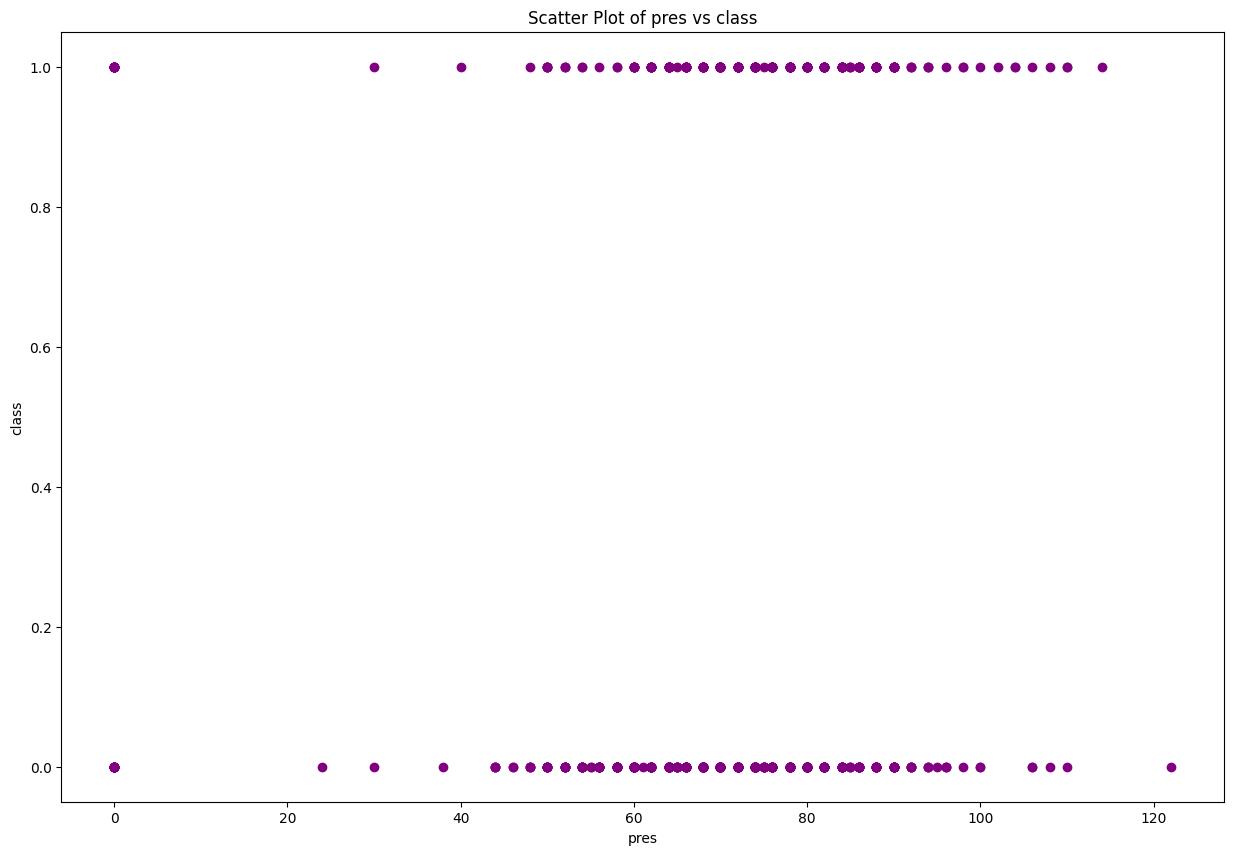

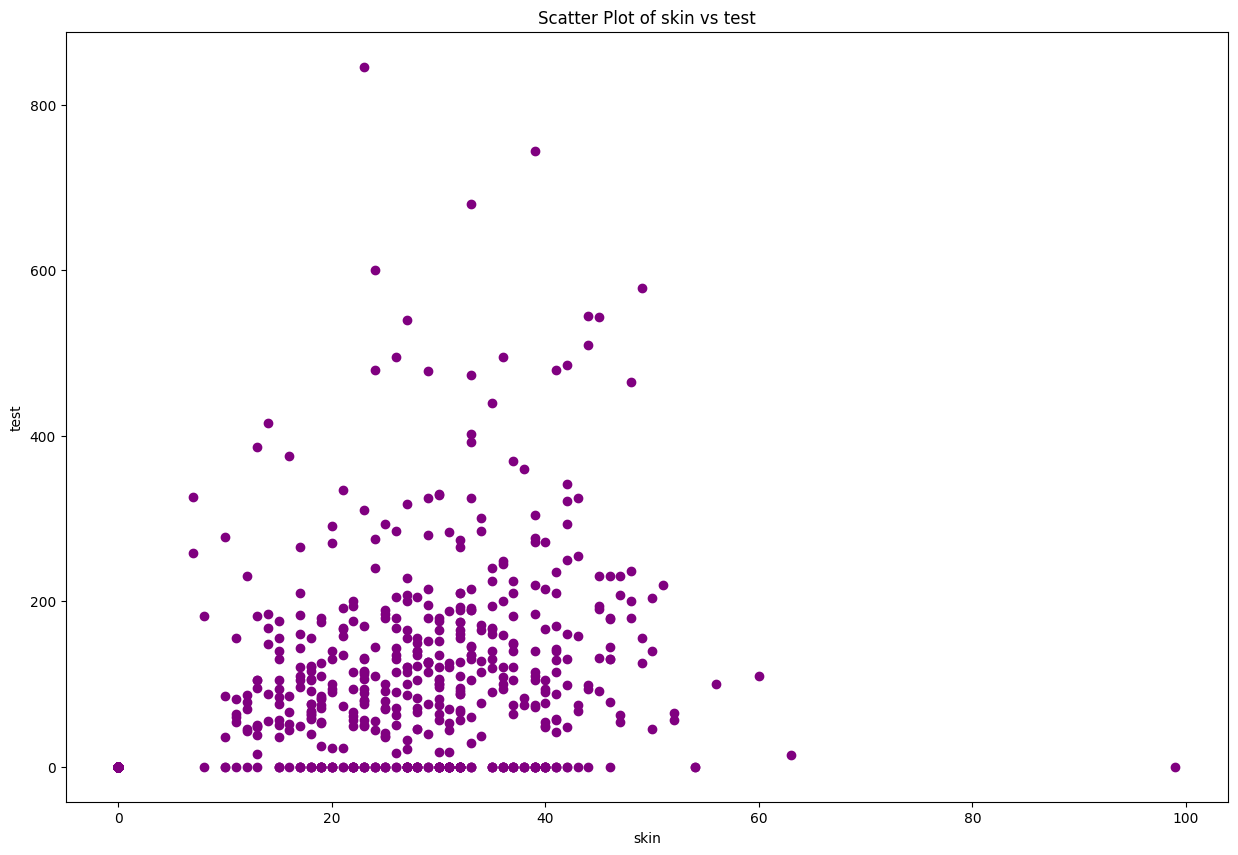

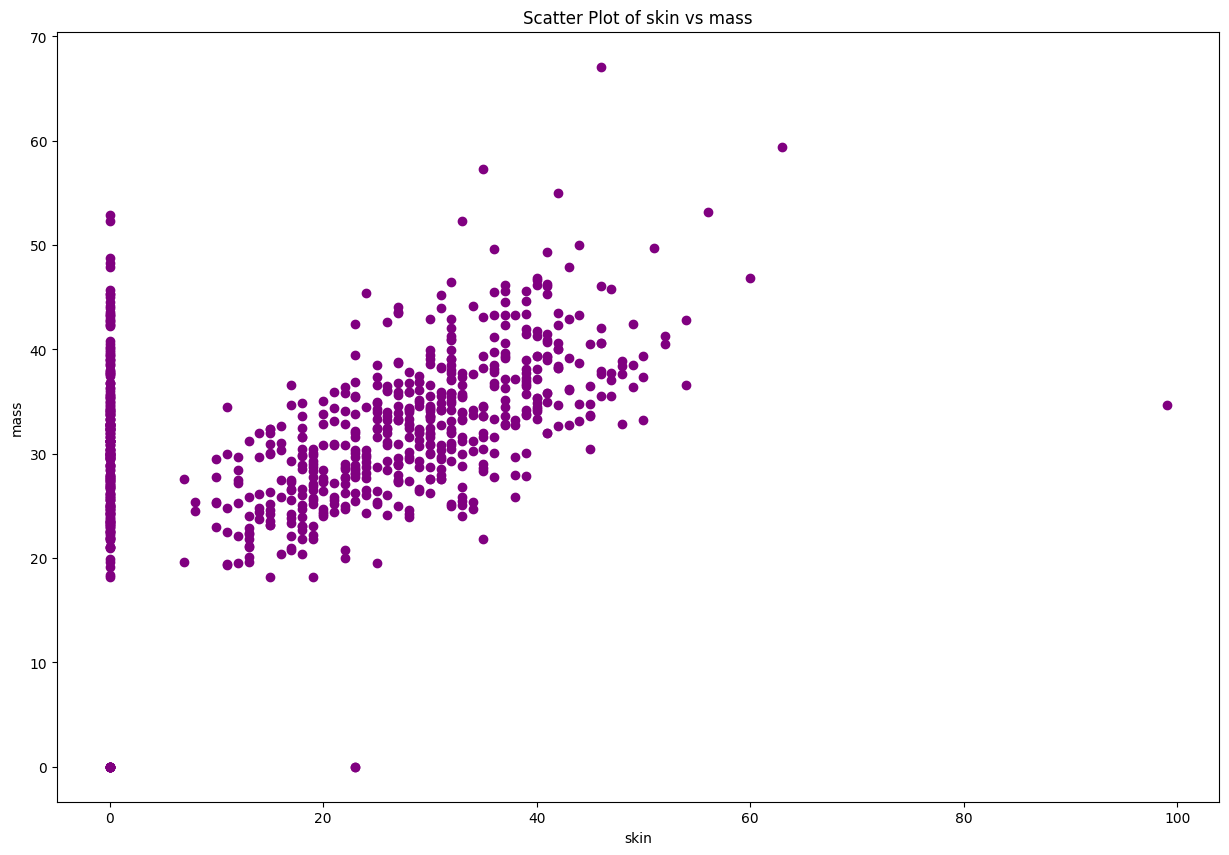

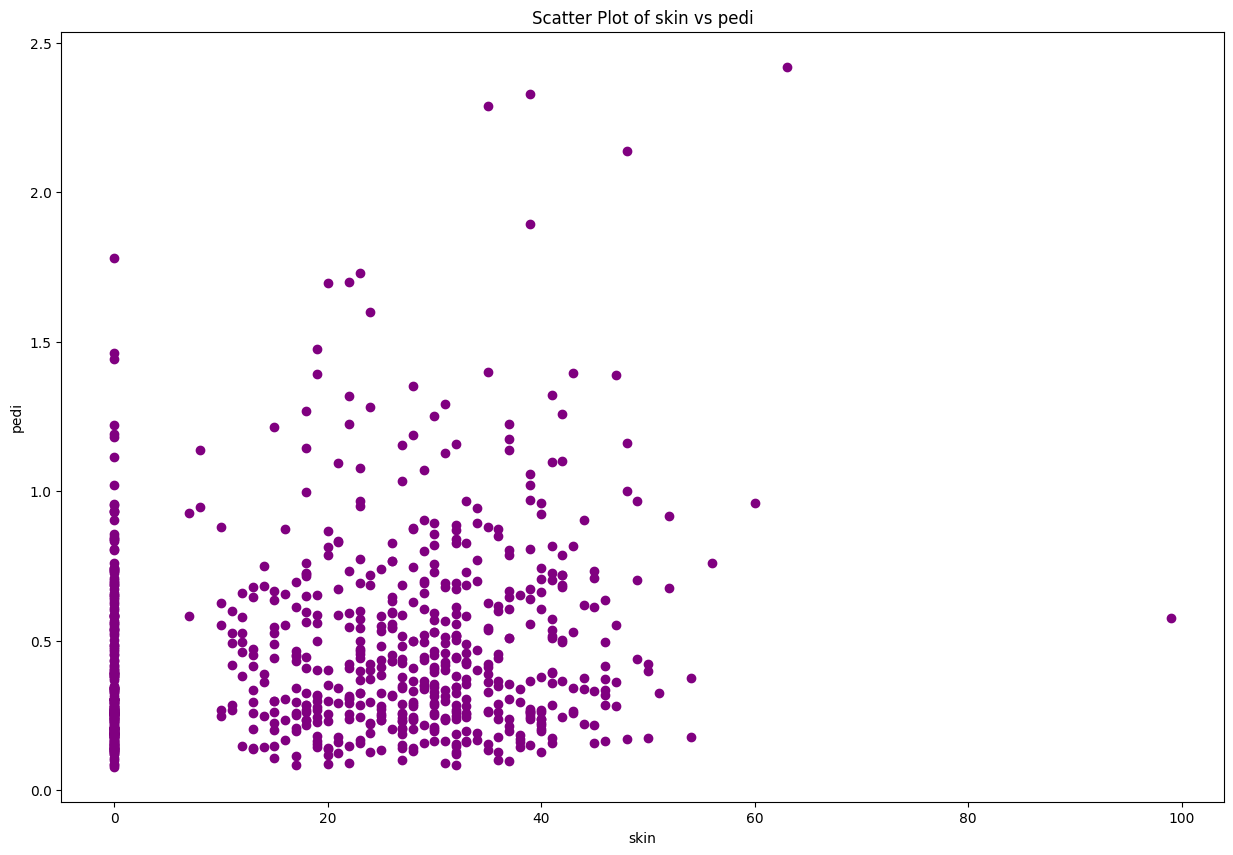

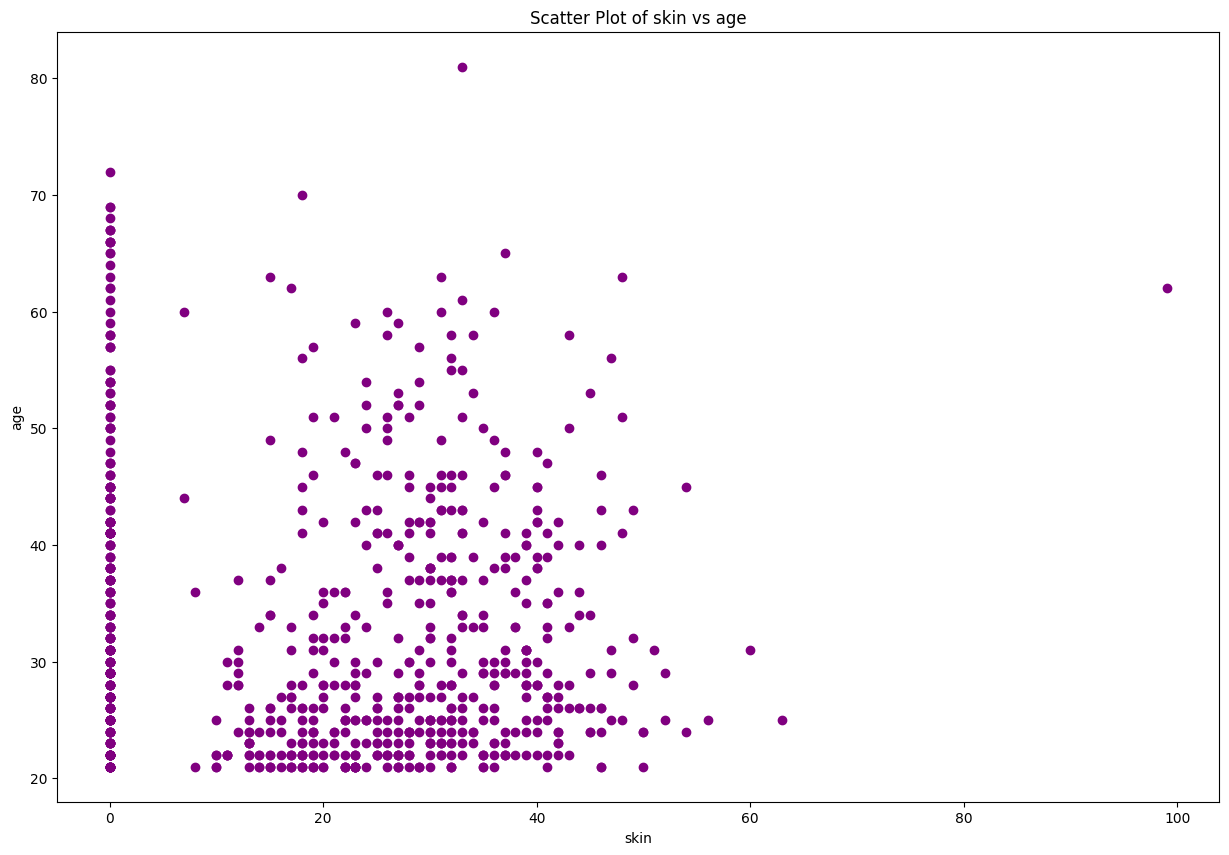

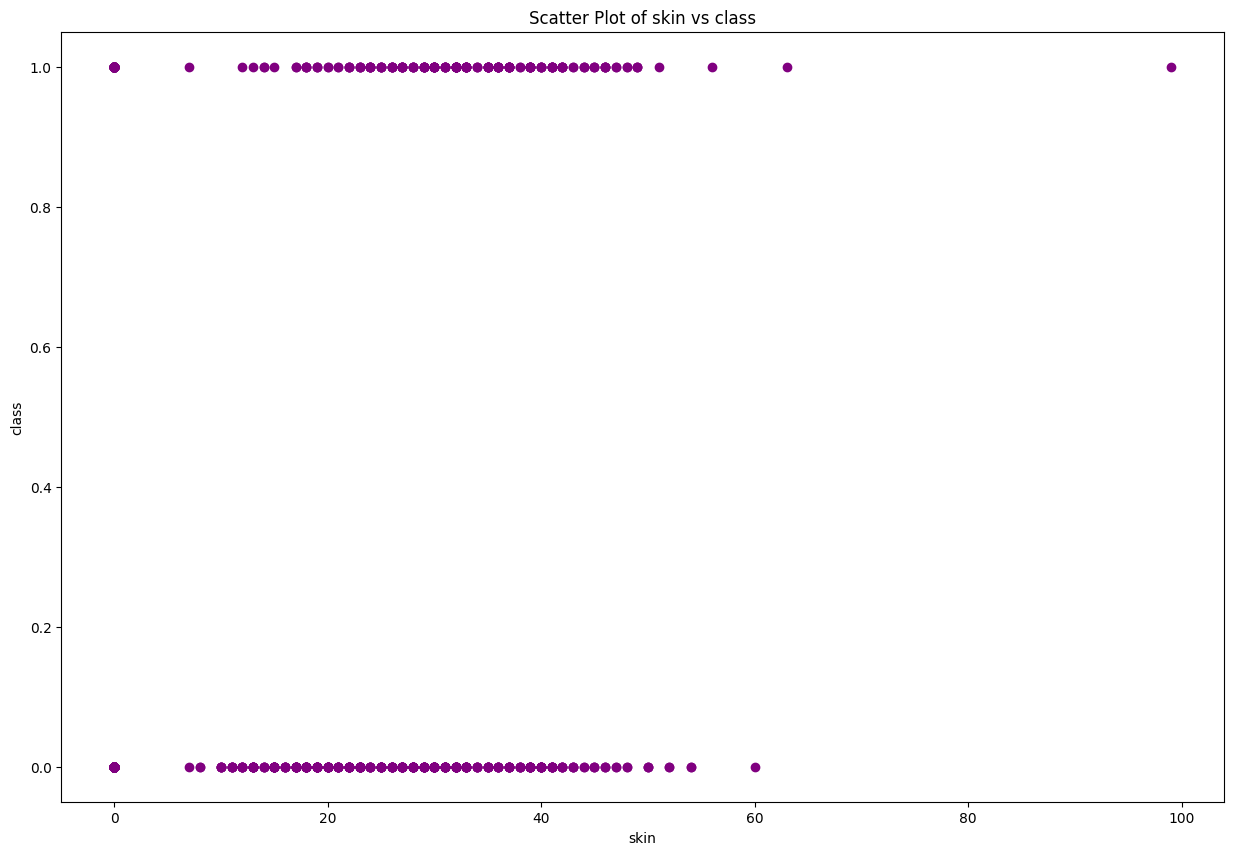

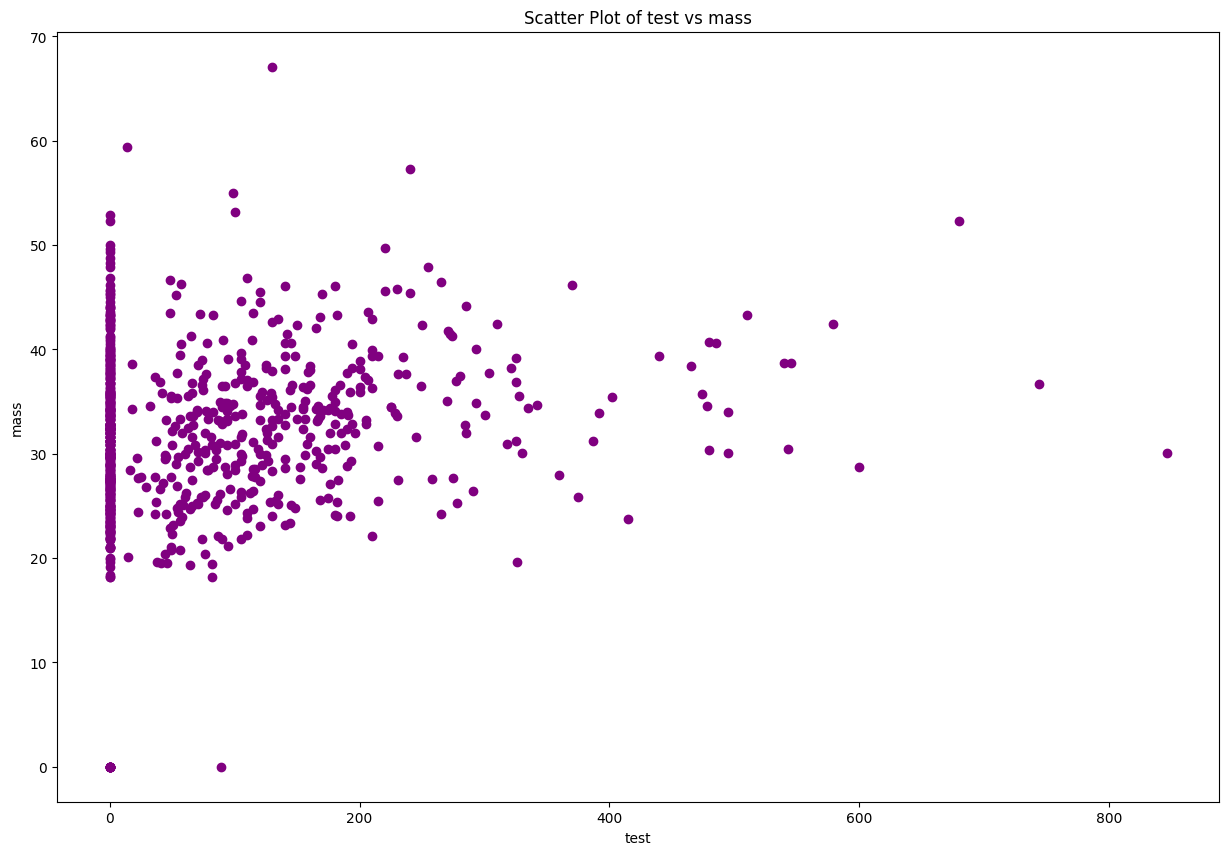

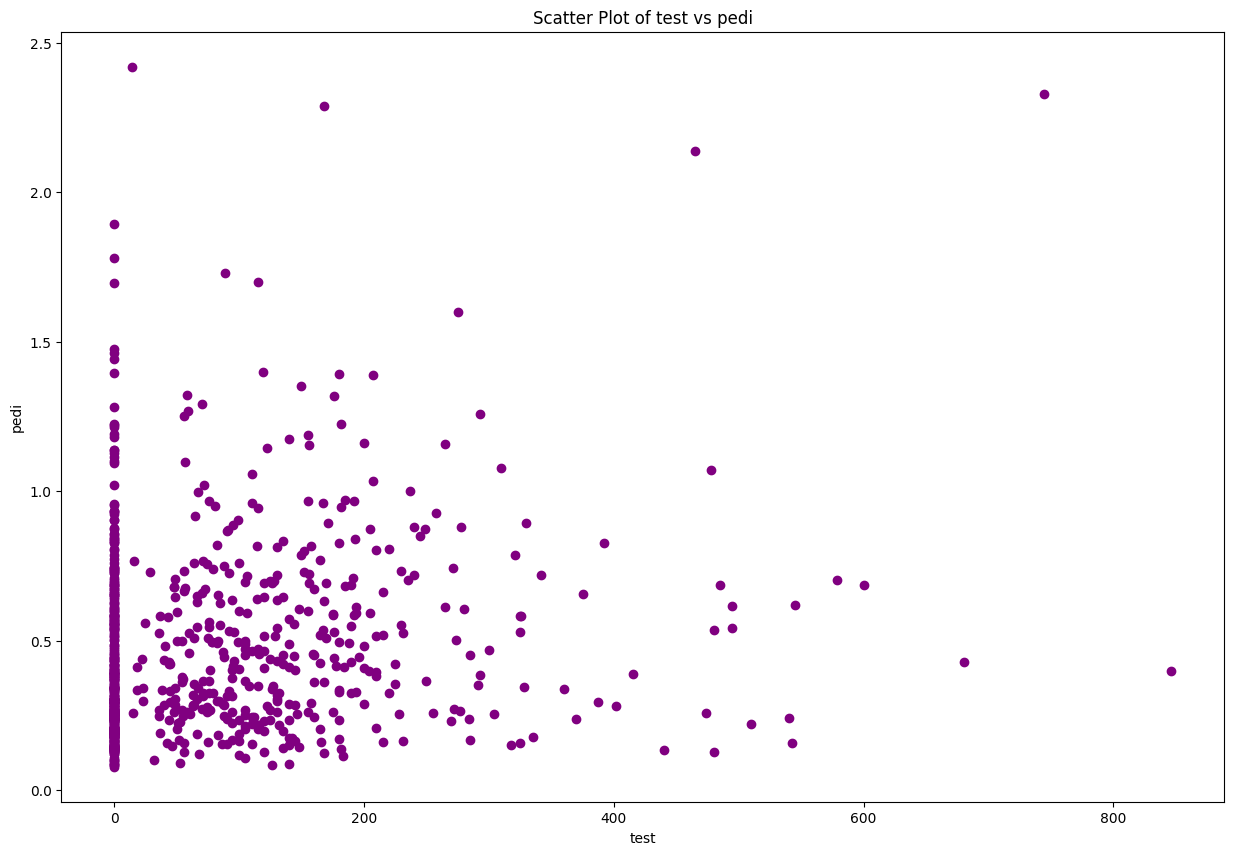

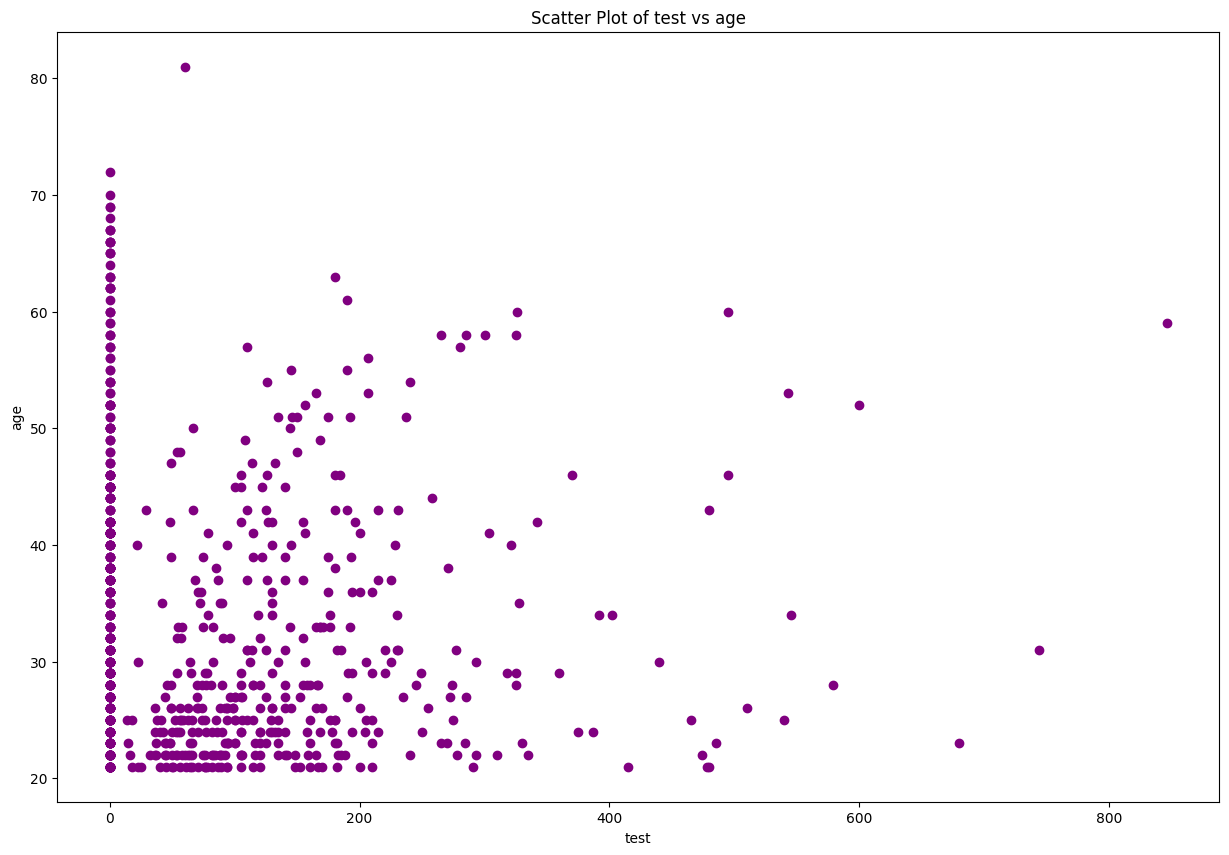

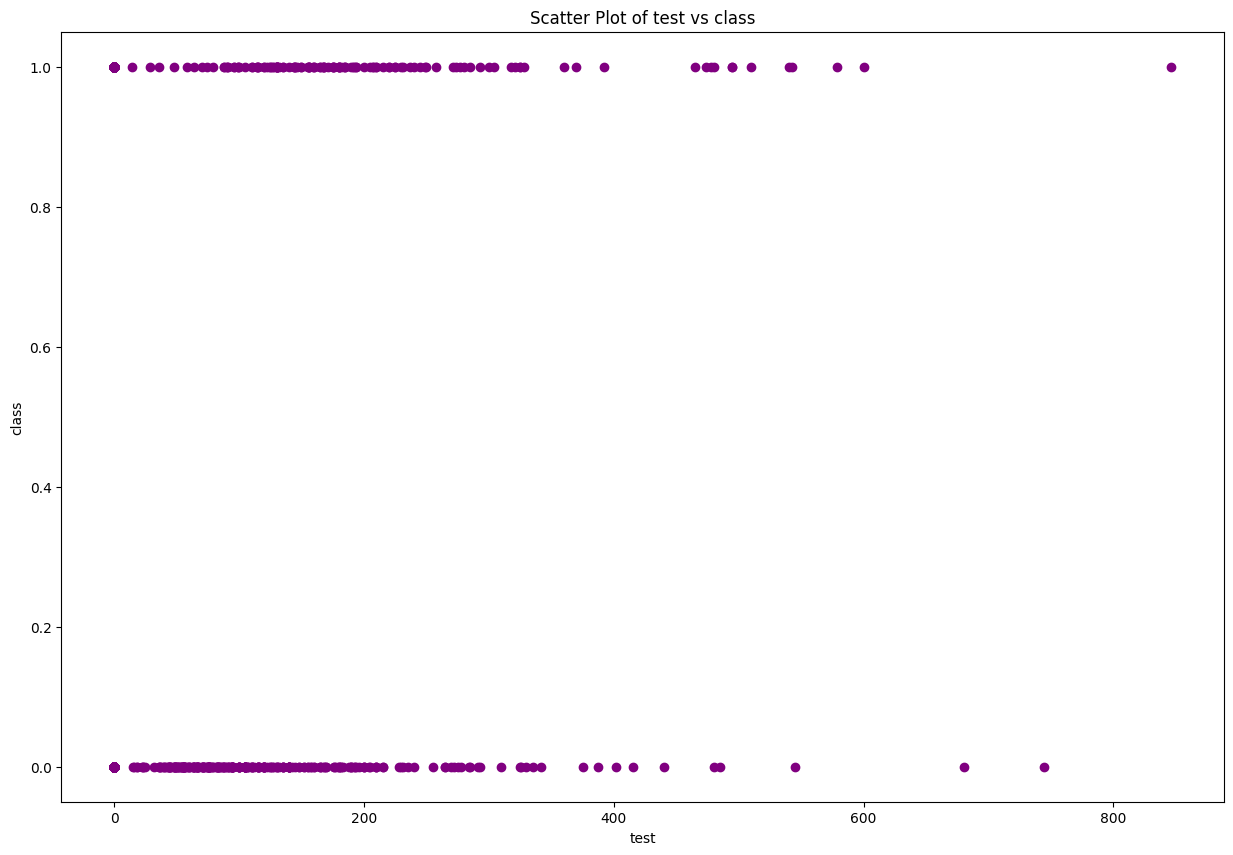

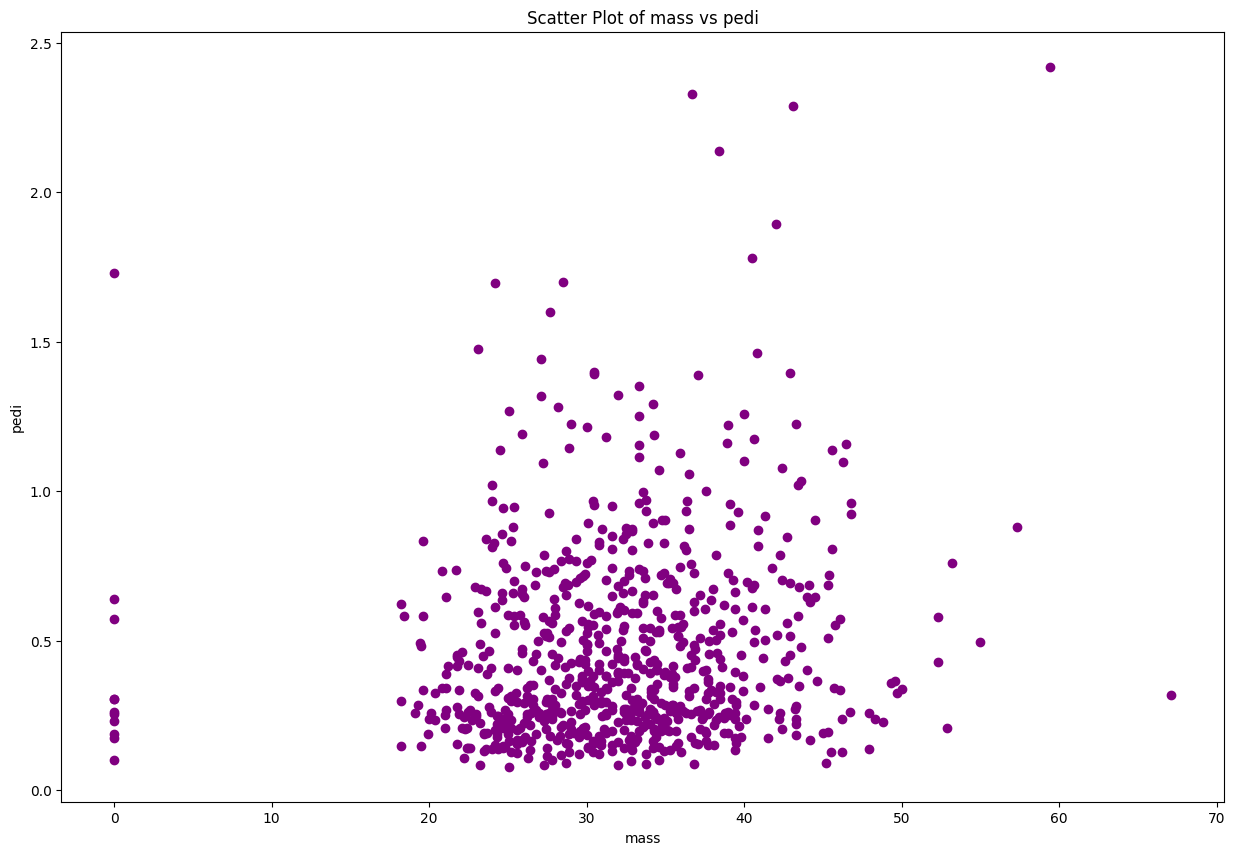

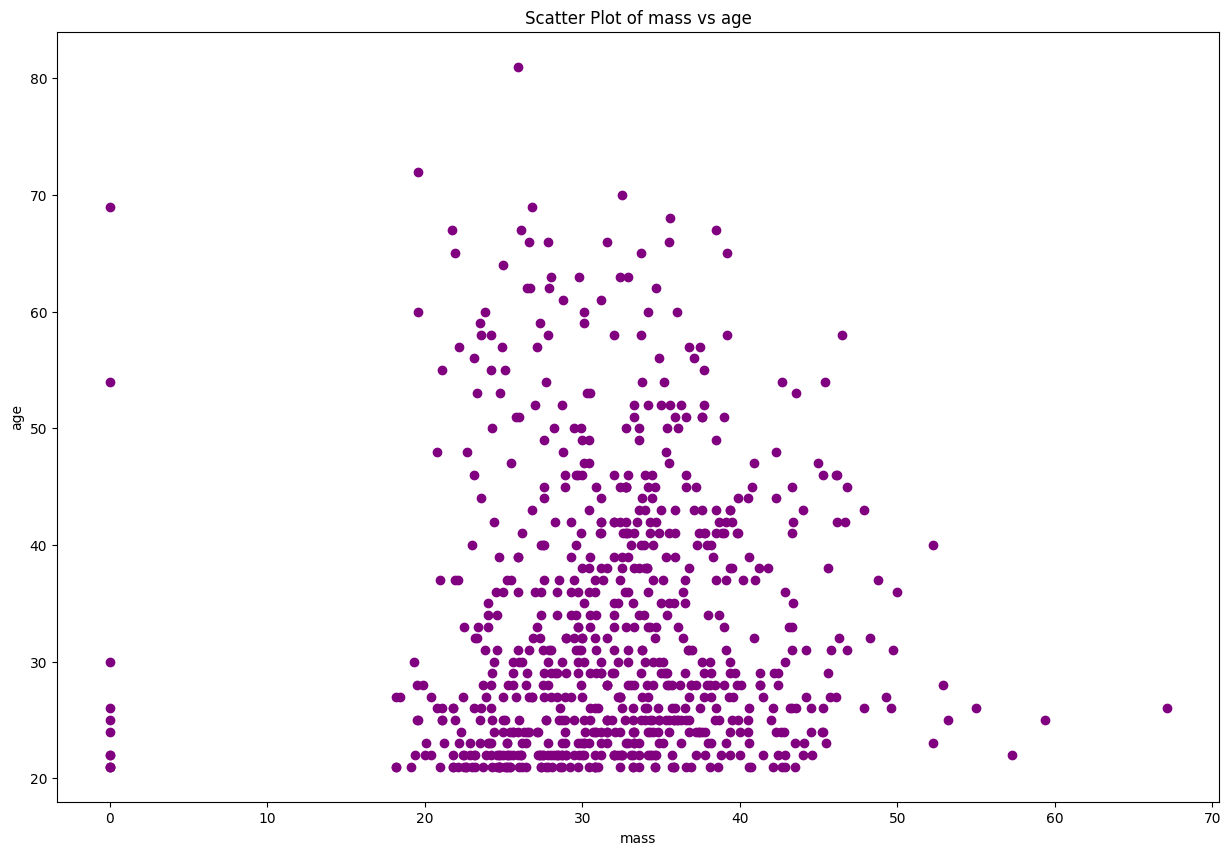

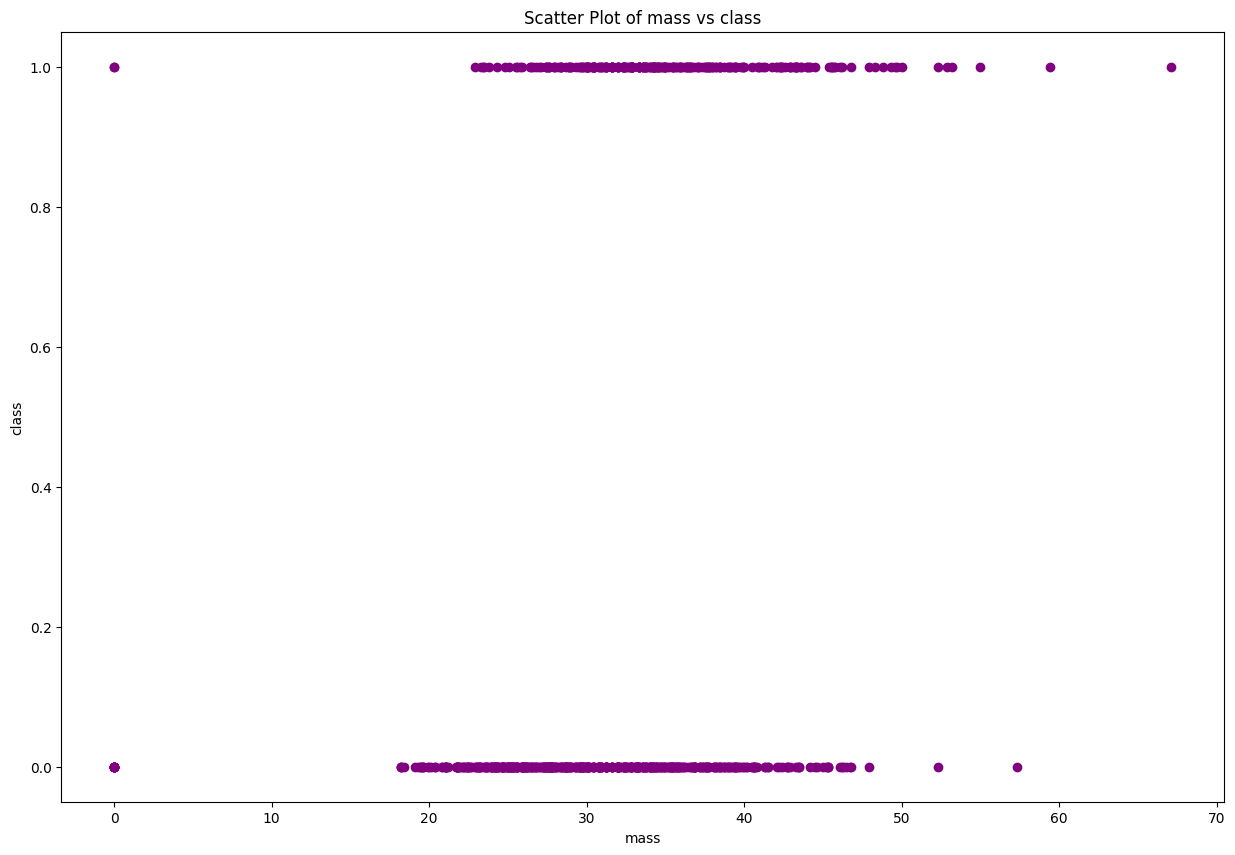

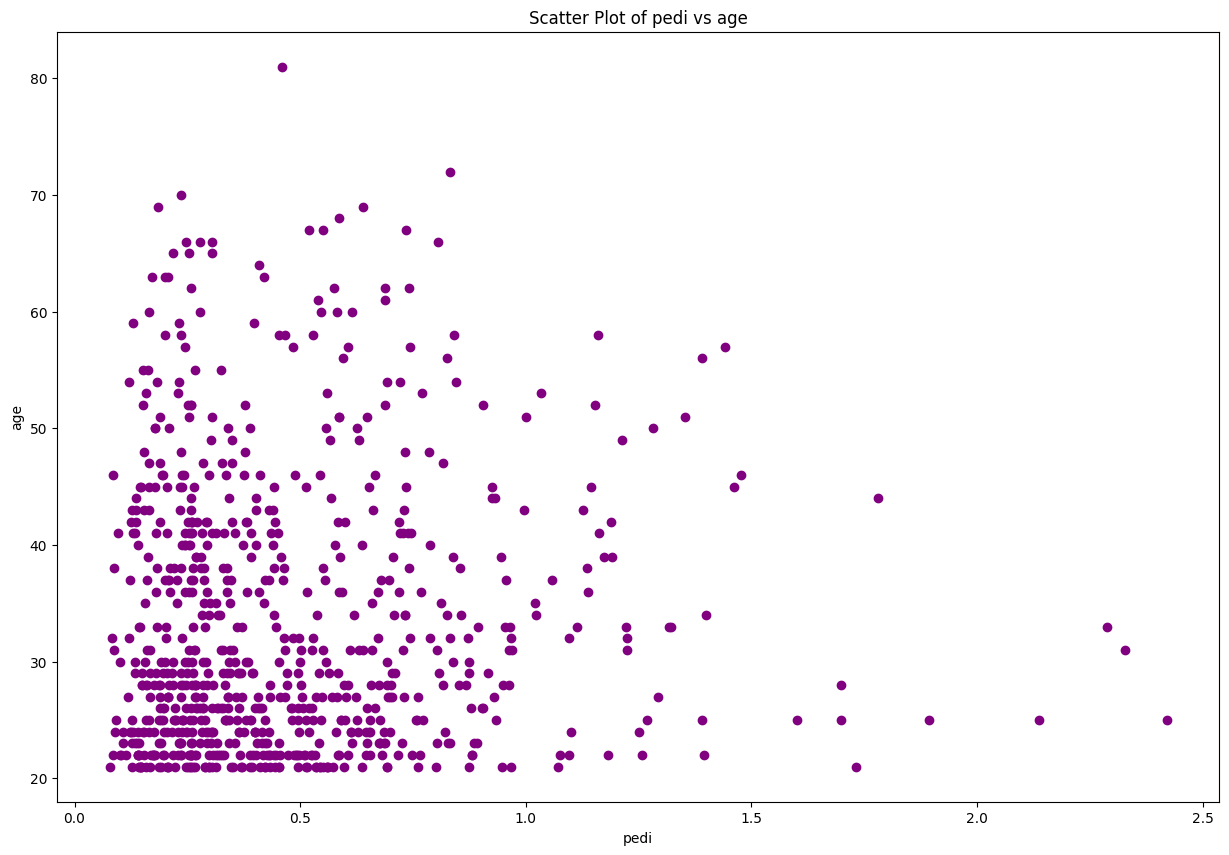

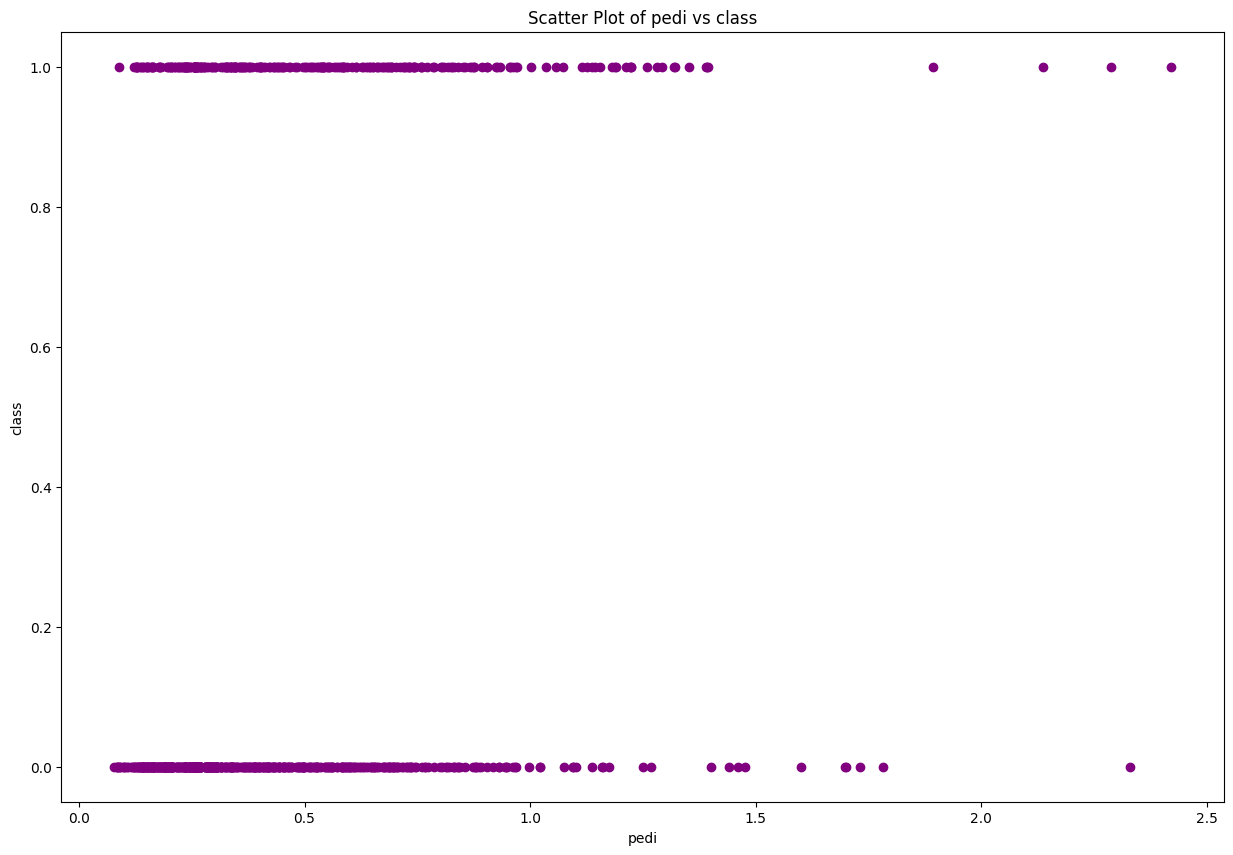

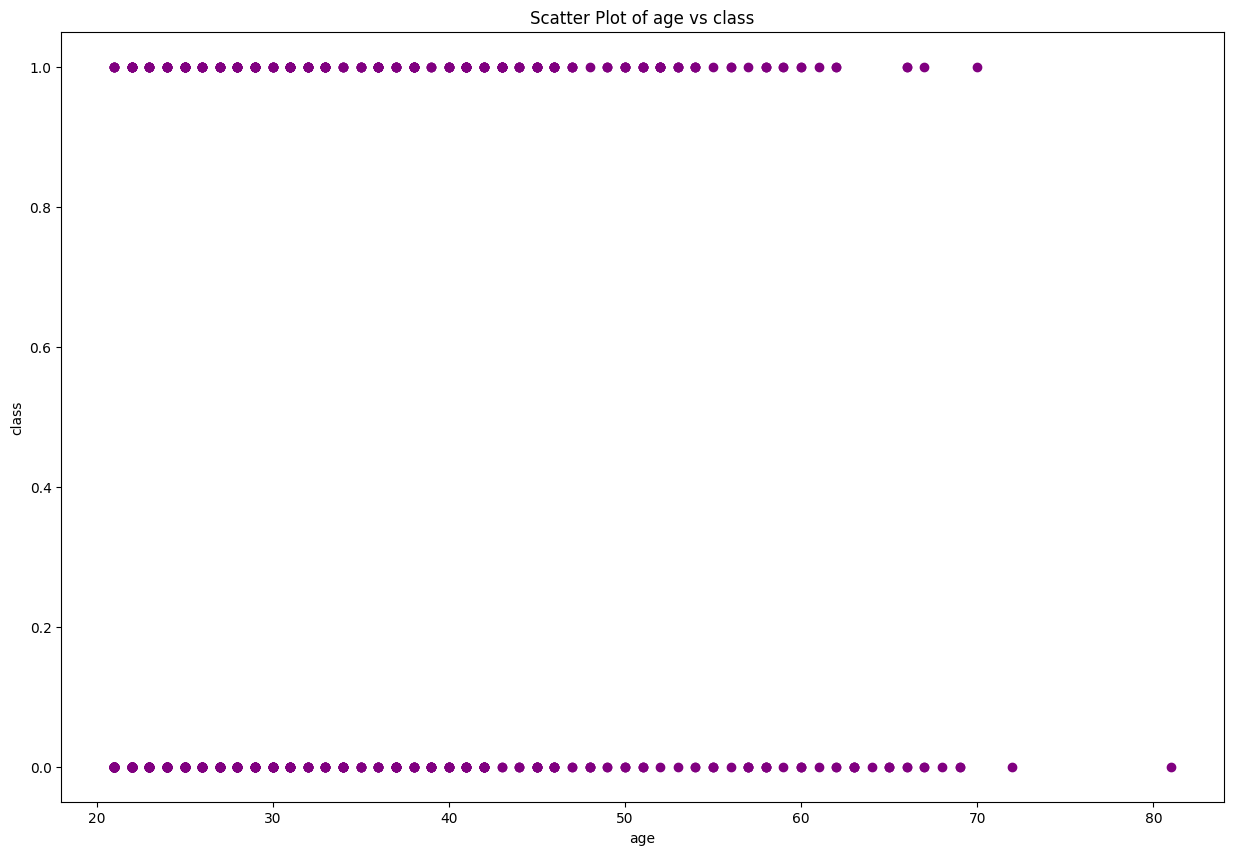

In [89]:
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv")

# Iterate over all pairs of variables
for i in range(len(names)):
    for j in range(i + 1, len(names)):
        pyplot.figure()
        pyplot.scatter(data[names[i]], data[names[j]], color='purple')
        pyplot.xlabel(names[i])
        pyplot.ylabel(names[j])
        pyplot.title(f"Scatter Plot of {names[i]} vs {names[j]}")
        pyplot.show()